# TensorBoard Metrics Analysis

This notebook fetches and plots metrics from a TensorBoard server, allowing for filtering and renaming of experiments.

## Runs

```
run       label                                               auc       accuracy  alpha  tau
85a4d335  SOTA2021-like - AdaFace + Sampler + HCL             0.875     0.809000  0.8    0.2
d1f1156d  SOTA2021-like - AdaFace + Sampler + HCL             0.870000  0.804000  0.8    0.08
e1ff6ba8  SOTA2021-like - AdaFace (random samples) + HCL      0.865000  0.800999  0.8    0.08
d6d09a30  SOTA2021-like - AdaFace (random samples) + HCL      0.864000  0.800000  0.8    0.2
13da2f02  AdaFace (sequential samples)                        0.861999  0.795000  0.0    0.2
ade621a9  SOTA2021-like - AdaFace (sequential samples)        0.856000  0.788999  0.0    0.08
b8fee24c  SOTA2021-like - AdaFace + Sampler                   0.864000  0.788999  0      0.08
e576b9b4  SOTA2021-like - AdaFace (random samples)            0.856999  0.787999  0      0.08
96b898ab  SOTA2021-like - AdaFace (sequential samples) + HCL  0.853999  0.786000  0.8    0.2
6f96a736  AdaFace (random samples                             0.851999  0.782000  0.0    0.2
61d0a0b0  SOTA2021-like - AdaFace + Sampler                   0.850000  0.777999  0      0.2
1fa6cde1  SOTA2021-like - AdaFace (sequential samples) + HCL  0.845000  0.776000  0.8    0.08
```

# Sampler results

```
run       label                                               auc       accuracy  alpha  tau
85a4d335  SOTA2021-like - AdaFace + Sampler + HCL             0.875     0.809000  0.8    0.2
d1f1156d  SOTA2021-like - AdaFace + Sampler + HCL             0.870000  0.804000  0.8    0.08
b8fee24c  SOTA2021-like - AdaFace + Sampler                   0.864000  0.788999  0      0.08
61d0a0b0  SOTA2021-like - AdaFace + Sampler                   0.850000  0.777999  0      0.2
```

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import io
import urllib.parse

import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Reset seaborn defaults and set the plot style
sns.reset_defaults()
plt.style.use(["science", "ieee", "grid", "no-latex"])

## Set Parameters

Set the TensorBoard URL, metrics to analyze, and output directory.

In [36]:
TENSORBOARD_URL = "http://arch-rog-strix:12345"  # Replace with your TensorBoard URL
METRICS = ["accuracy", "auc", "loss/train", "loss/val"]  # Replace with your desired metrics
OUTPUT_DIR = "plots_experiments"  # Replace with your desired output directory

In [37]:
def fetch_scalar_data(url, run, tag):
    encoded_run = urllib.parse.quote(run, safe='')
    encoded_tag = urllib.parse.quote(tag, safe='')
    full_url = f"{url}/data/plugin/scalars/scalars?run={encoded_run}&tag={encoded_tag}&format=csv"
    try:
        response = requests.get(full_url)
        response.raise_for_status()
        return pd.read_csv(io.StringIO(response.text))
    except requests.RequestException as e:
        print(f"Failed to fetch data for run '{run}', tag '{tag}': {e}")
        print(f"URL attempted: {full_url}")
        return None

def fetch_runs(url):
    try:
        response = requests.get(f"{url}/data/runs")
        response.raise_for_status()
        runs = response.json()
        # Filter out runs with ".guild" in the name
        filtered_runs = [run for run in runs if ".guild" not in run]
        print(f"Found {len(filtered_runs)} runs after filtering")
        return filtered_runs
    except requests.RequestException as e:
        print(f"Failed to fetch runs: {e}")
        return []

## Fetch and Rename Runs

In [38]:
def fetch_and_display_runs(tensorboard_url):
    """Fetch runs from the specified TensorBoard URL and display them."""
    runs = fetch_runs(tensorboard_url)
    for idx, run in enumerate(runs):
        print(f"{idx}: {run}")
    return runs

def get_order_indices(runs):
    """Get the order of indices from user input."""
    order_input = input("Enter the indices of the runs in the desired order (e.g., 0,2,1): ")
    if order_input:
        return [int(i) for i in order_input.split(",")]
    else:
        return list(range(len(runs)))

def build_ordered_runs(runs, order_indices):
    """Build an ordered list of runs based on user input indices."""
    ordered_runs = []
    for index in order_indices:
        if index < len(runs):
            ordered_runs.append(runs[index])
        else:
            print(f"Index {index} is out of range. Please provide valid indices.")
    return ordered_runs

def rename_runs(ordered_runs):
    """Rename runs based on user input."""
    renamed_runs = {}
    for run in ordered_runs:
        new_name = input(f"Enter new name for run '{run}' (press Enter to keep current name): ").strip()
        renamed_runs[run] = new_name if new_name else run.split()[0]
    return renamed_runs

def prepare_runs(tensorboard_url):
    """Main function to orchestrate fetching, ordering, and renaming runs."""
    runs = fetch_and_display_runs(tensorboard_url)
    order_indices = get_order_indices(runs)
    ordered_runs = build_ordered_runs(runs, order_indices)
    renamed_runs = rename_runs(ordered_runs)
    print("Renamed runs:", renamed_runs)
    return renamed_runs

In [39]:
# Example usage
renamed_runs = prepare_runs(TENSORBOARD_URL)

Found 12 runs after filtering
0: 13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0
1: 1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
2: 61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
3: 6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0
4: 85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0
5: 96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
6: ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0
7: b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
8: d1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightnin

Enter the indices of the runs in the desired order (e.g., 0,2,1):  2,7,8,4
Enter new name for run '61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0' (press Enter to keep current name):  Sampler ($\tau = 0.2$)
Enter new name for run 'b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0' (press Enter to keep current name):  Sampler ($\tau = 0.08$)
Enter new name for run 'd1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Sampler + HCL ($\tau = 0.08$)
Enter new name for run '85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Sampler + HCL ($\tau = 0.2$)


Renamed runs: {'61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0': 'Sampler ($\\tau = 0.2$)', 'b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0': 'Sampler ($\\tau = 0.08$)', 'd1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0': 'Sampler + HCL ($\\tau = 0.08$)', '85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0': 'Sampler + HCL ($\\tau = 0.2$)'}


## Load Data

In [40]:
def fetch_and_process_metrics(renamed_runs, metrics, tensorboard_url):
    """
    Fetch scalar data for given runs and metrics, and return a combined DataFrame.

    Parameters:
    - renamed_runs (dict): A dictionary mapping original run names to new run names.
    - metrics (list): A list of metrics to fetch.
    - tensorboard_url (str): The URL for TensorBoard data fetching.

    Returns:
    - pd.DataFrame: A DataFrame containing the fetched data, or None if no data was fetched.
    """
    data = []
    for original_run, new_run_name in renamed_runs.items():
        for metric in metrics:
            metric_data = fetch_scalar_data(tensorboard_url, original_run, metric)
            if metric_data is not None:
                print(f"{metric} fetched for run {new_run_name}")
                metric_data['run'] = new_run_name
                metric_data['metric'] = metric
                data.append(metric_data)
            else:
                print(f"No data for {metric} in run {new_run_name}")

    if not data:
        print("No data was successfully fetched.")
        return None
    else:
        df = pd.concat(data, ignore_index=True)
        print(df.head())
        return df

In [41]:
# Example usage:
df = fetch_and_process_metrics(renamed_runs, METRICS, TENSORBOARD_URL)

accuracy fetched for run Sampler ($\tau = 0.2$)
auc fetched for run Sampler ($\tau = 0.2$)
loss/train fetched for run Sampler ($\tau = 0.2$)
loss/val fetched for run Sampler ($\tau = 0.2$)
accuracy fetched for run Sampler ($\tau = 0.08$)
auc fetched for run Sampler ($\tau = 0.08$)
loss/train fetched for run Sampler ($\tau = 0.08$)
loss/val fetched for run Sampler ($\tau = 0.08$)
accuracy fetched for run Sampler + HCL ($\tau = 0.08$)
auc fetched for run Sampler + HCL ($\tau = 0.08$)
loss/train fetched for run Sampler + HCL ($\tau = 0.08$)
loss/val fetched for run Sampler + HCL ($\tau = 0.08$)
accuracy fetched for run Sampler + HCL ($\tau = 0.2$)
auc fetched for run Sampler + HCL ($\tau = 0.2$)
loss/train fetched for run Sampler + HCL ($\tau = 0.2$)
loss/val fetched for run Sampler + HCL ($\tau = 0.2$)
      Wall time  Step     Value                     run    metric
0  1.726724e+09   237  0.741780  Sampler ($\tau = 0.2$)  accuracy
1  1.726724e+09   475  0.780473  Sampler ($\tau = 0.2$) 

## Plot Metrics

In [42]:
def create_metric_plot(df, metrics, output_dir, mark_x_epochs=5):
    """
    Create and save plots for specified metrics from the given DataFrame.

    Parameters:
    - df: DataFrame containing the metric data.
    - metrics: List of metrics to plot.
    - output_dir: Directory where plots will be saved.
    - mark_x_epochs: Number of epochs at which to mark points on the plot.
    """
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    title_mappings = {"auc": "AUC", "accuracy": "Accuracy", "loss/val": "Validation loss", "loss/train": "Training loss"}

    for idx, metric in enumerate(metrics):
        plt.figure(figsize=(5, 4))
        metric_data = df[df['metric'] == metric]

        if metric_data.empty:
            print(f"No data available for metric: {metric}")
            continue

        for run in metric_data['run'].unique():
            run_data = metric_data[metric_data['run'] == run]
            line, = plt.plot(run_data['Step'], run_data['Value'], '--', label=run)

            # Annotate the plot at the specified intervals
            # for step in run_data['Step']:
            #     step_value = run_data[run_data['Step'] == step]['Value'].values[0]
            #     xy = (step, step_value)
            #     line_color = line.get_color()
# 
            #     if "Sequential" in run:
            #         if not (step + 1) % (mark_x_epochs * 50):
            #             epoch = (step - 1) // 50
            #             plt.plot(step, step_value, '.', color=line_color)
            #             plt.annotate(f'{epoch}', xy=xy,
            #                          textcoords="offset points", xytext=(-3, 10), ha='center', color=line_color, size=10)
            #     elif "HCL" in run:
            #         if not (step + 1) % (mark_x_epochs * 238):
            #             epoch = (step - 1) // 238
            #             plt.plot(step, step_value, '.', color=line_color)
            #             plt.annotate(f'{epoch}', xy=xy,
            #                          textcoords="offset points", xytext=(5, -10), ha='center', color=line_color, size=10)

        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.title(f"{title_mappings.get(metric, metric)}", fontsize=16)
        plt.xlabel("Step", fontsize=16)
        plt.ylabel("Value", fontsize=16)

        if idx == 0:
            plt.legend(title="Runs", fontsize=12)

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Save the plot
        metric_safe = metric.replace("/", "_")
        plt.savefig(f"{output_dir}/{metric_safe}.png", dpi=200)
        plt.show()

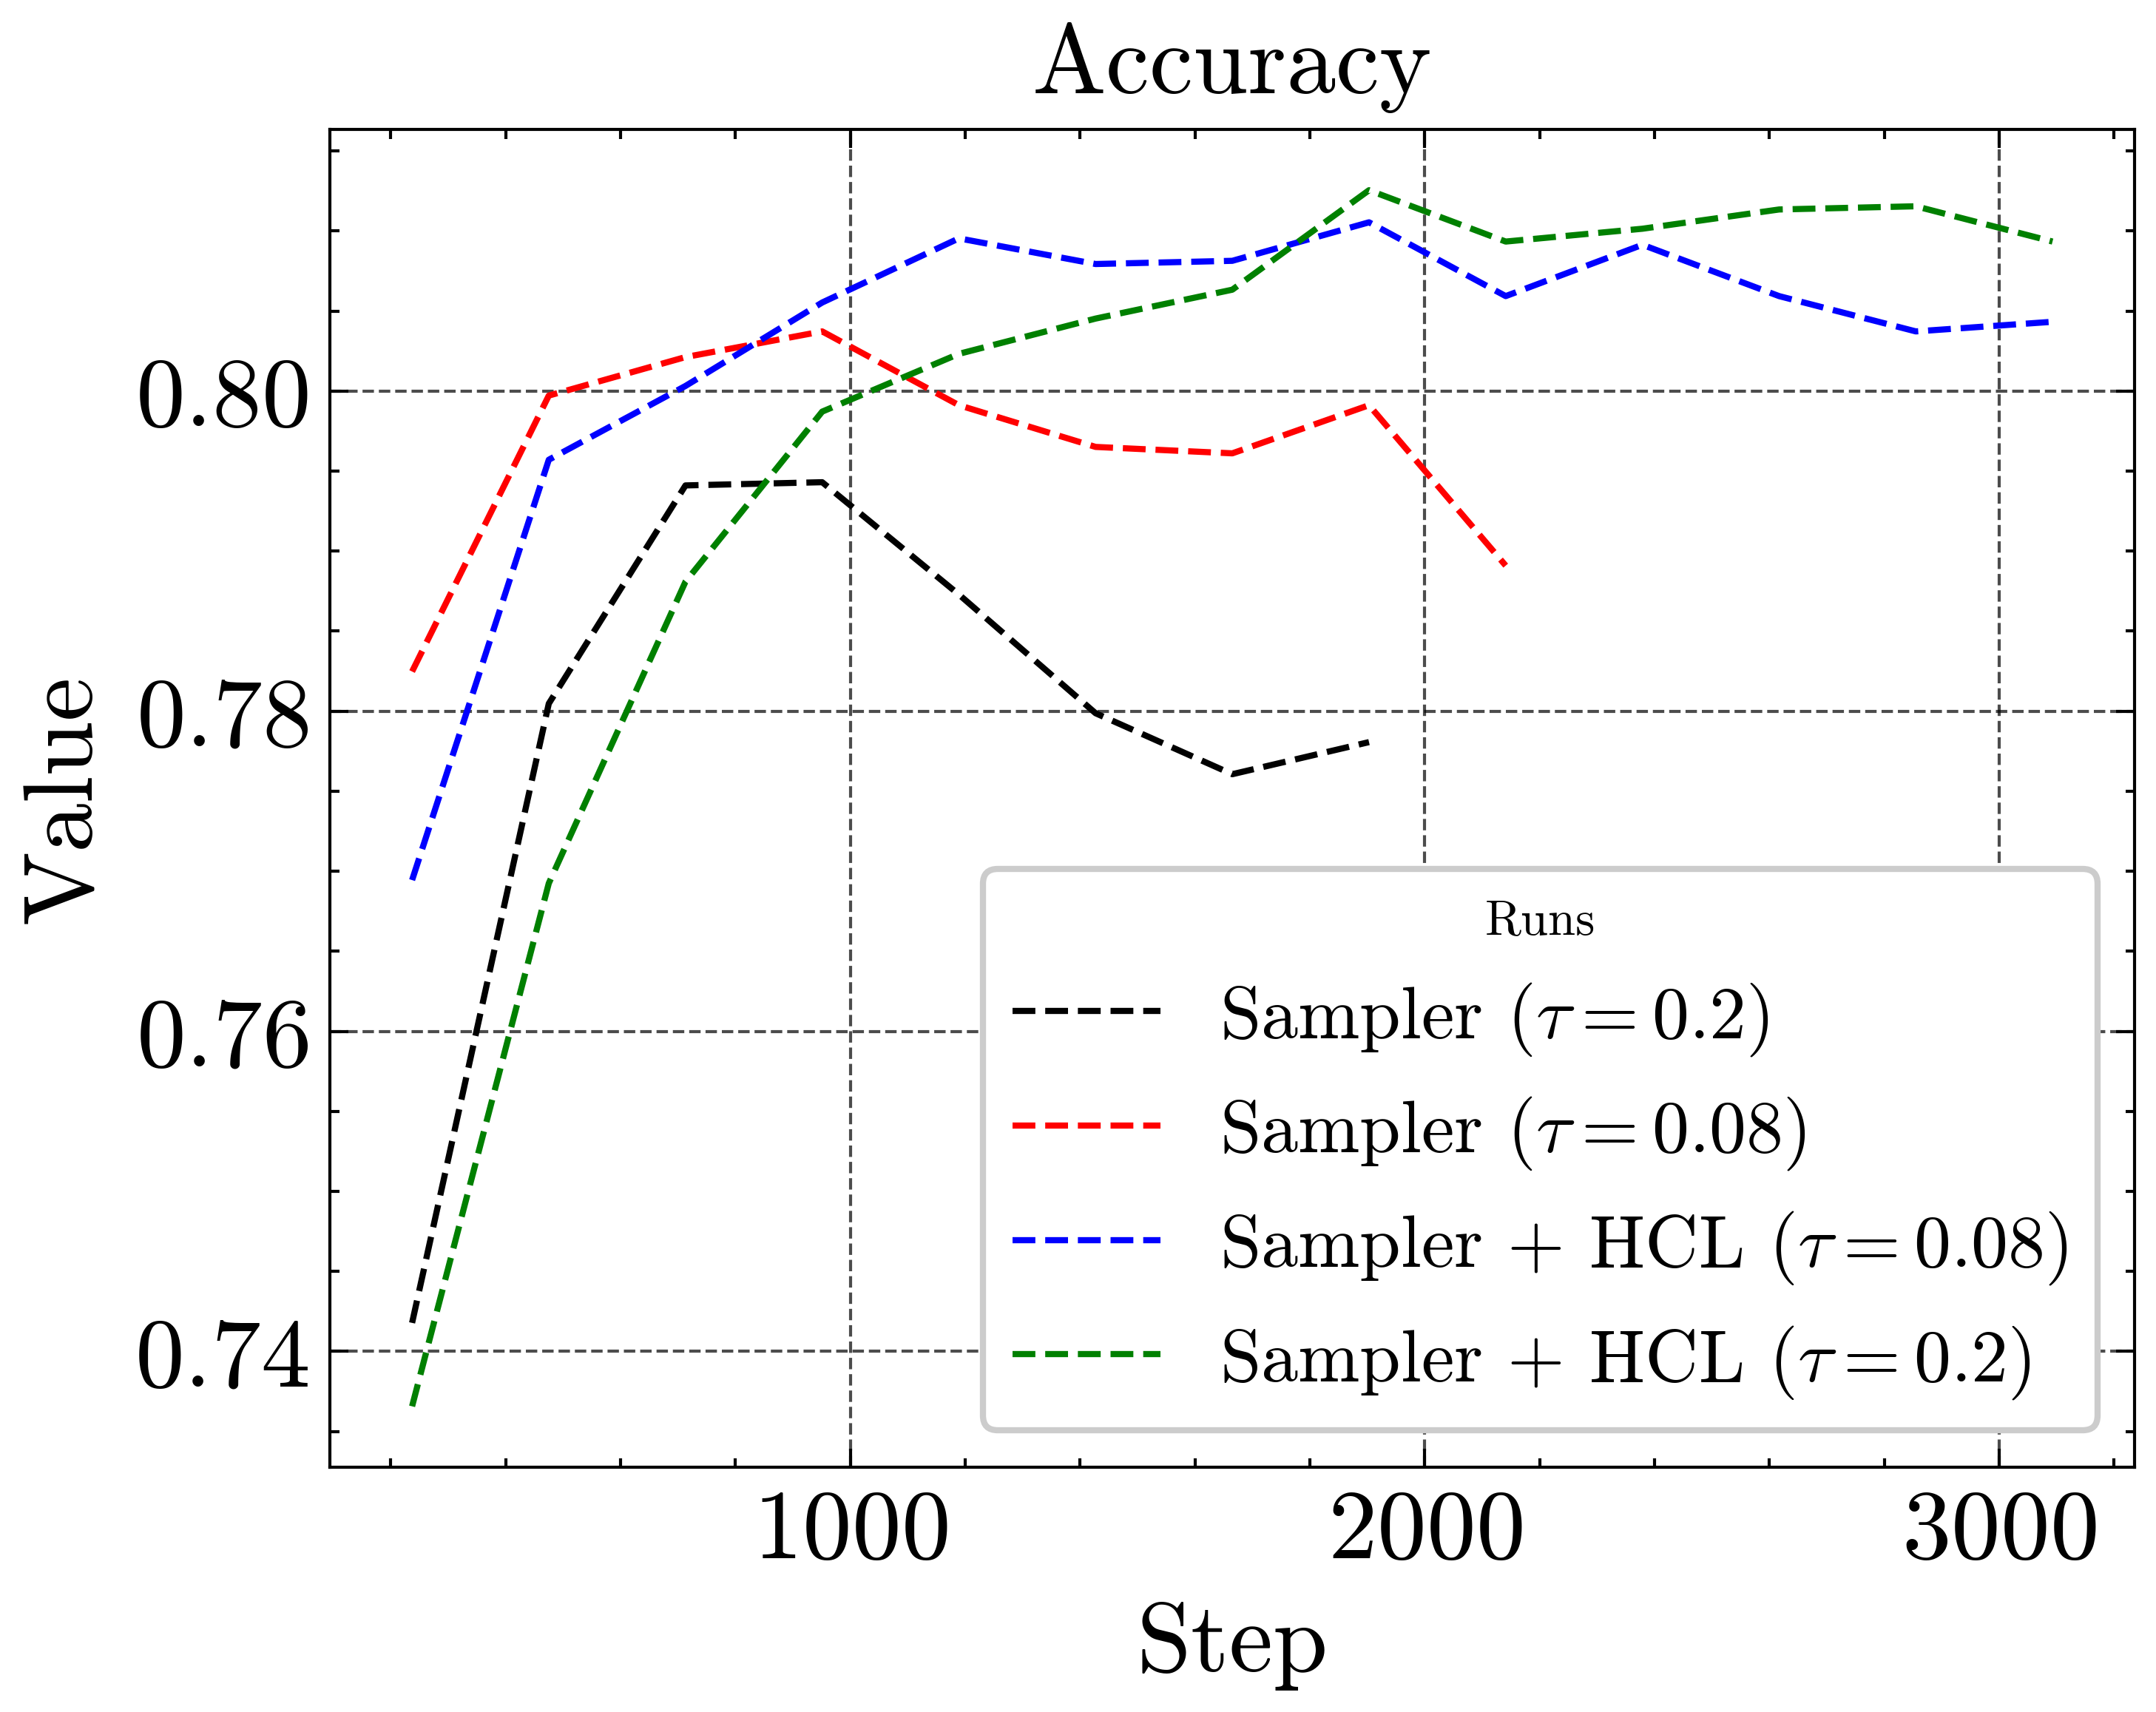

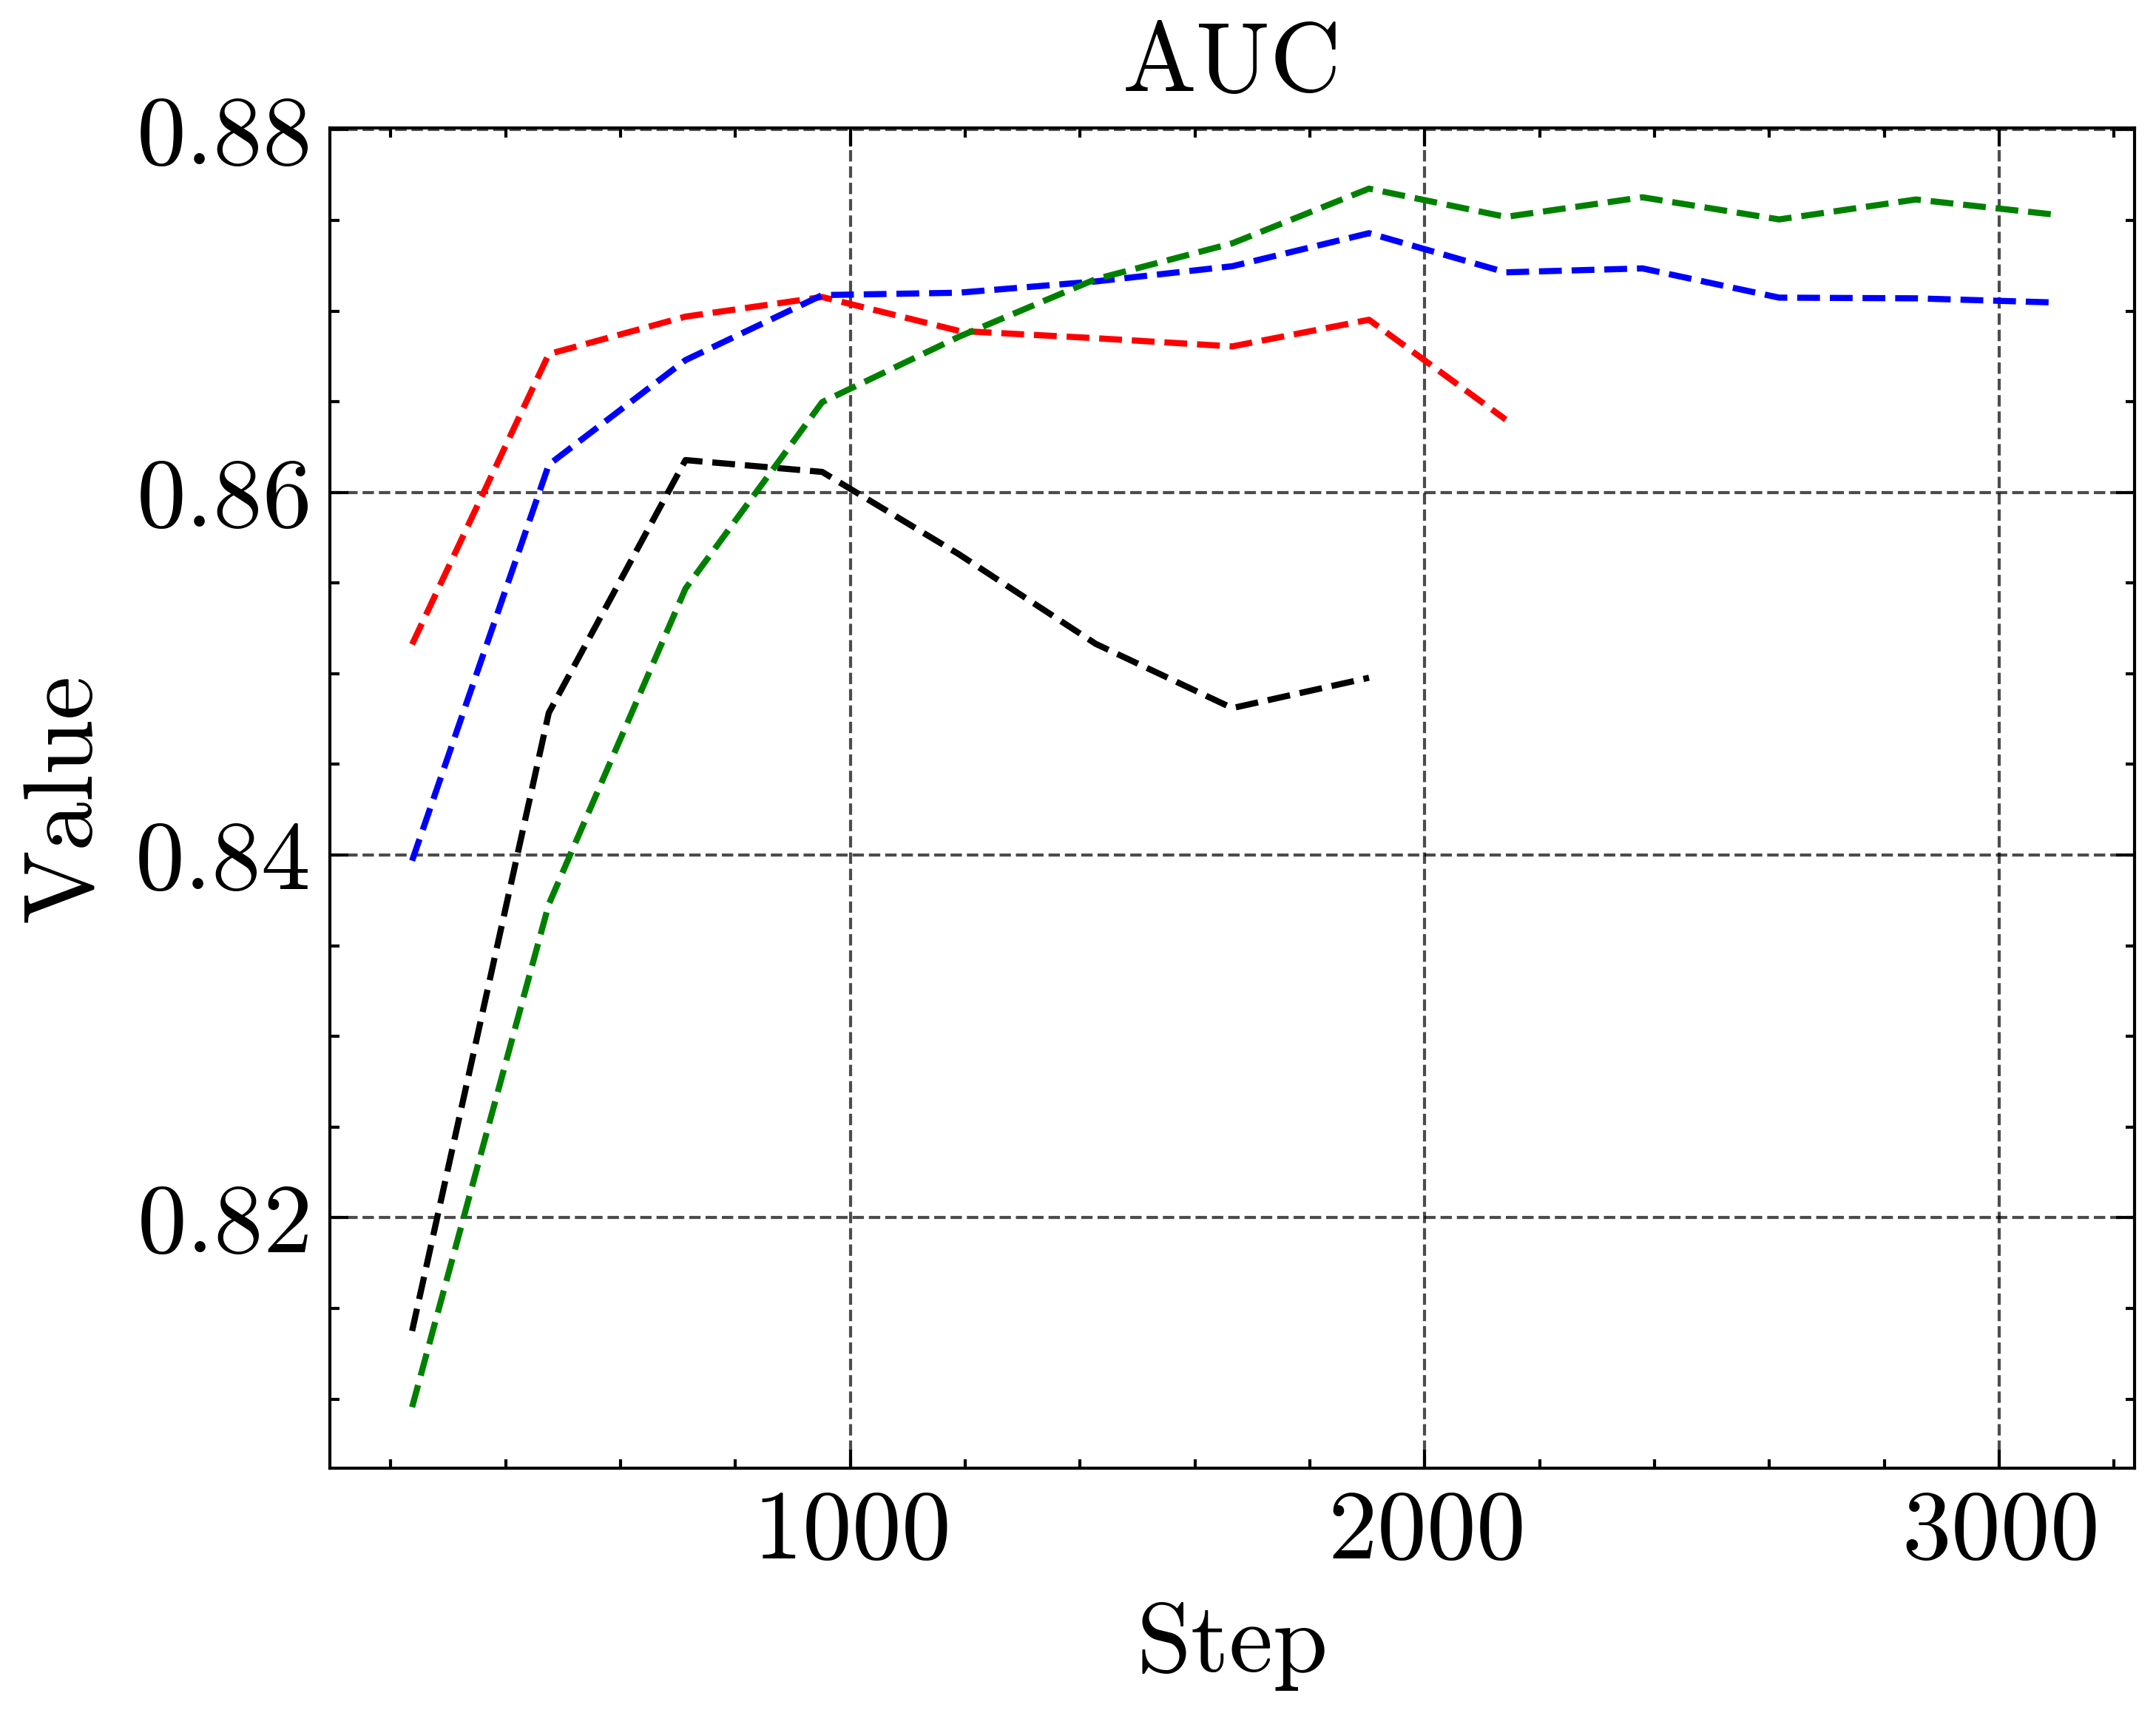

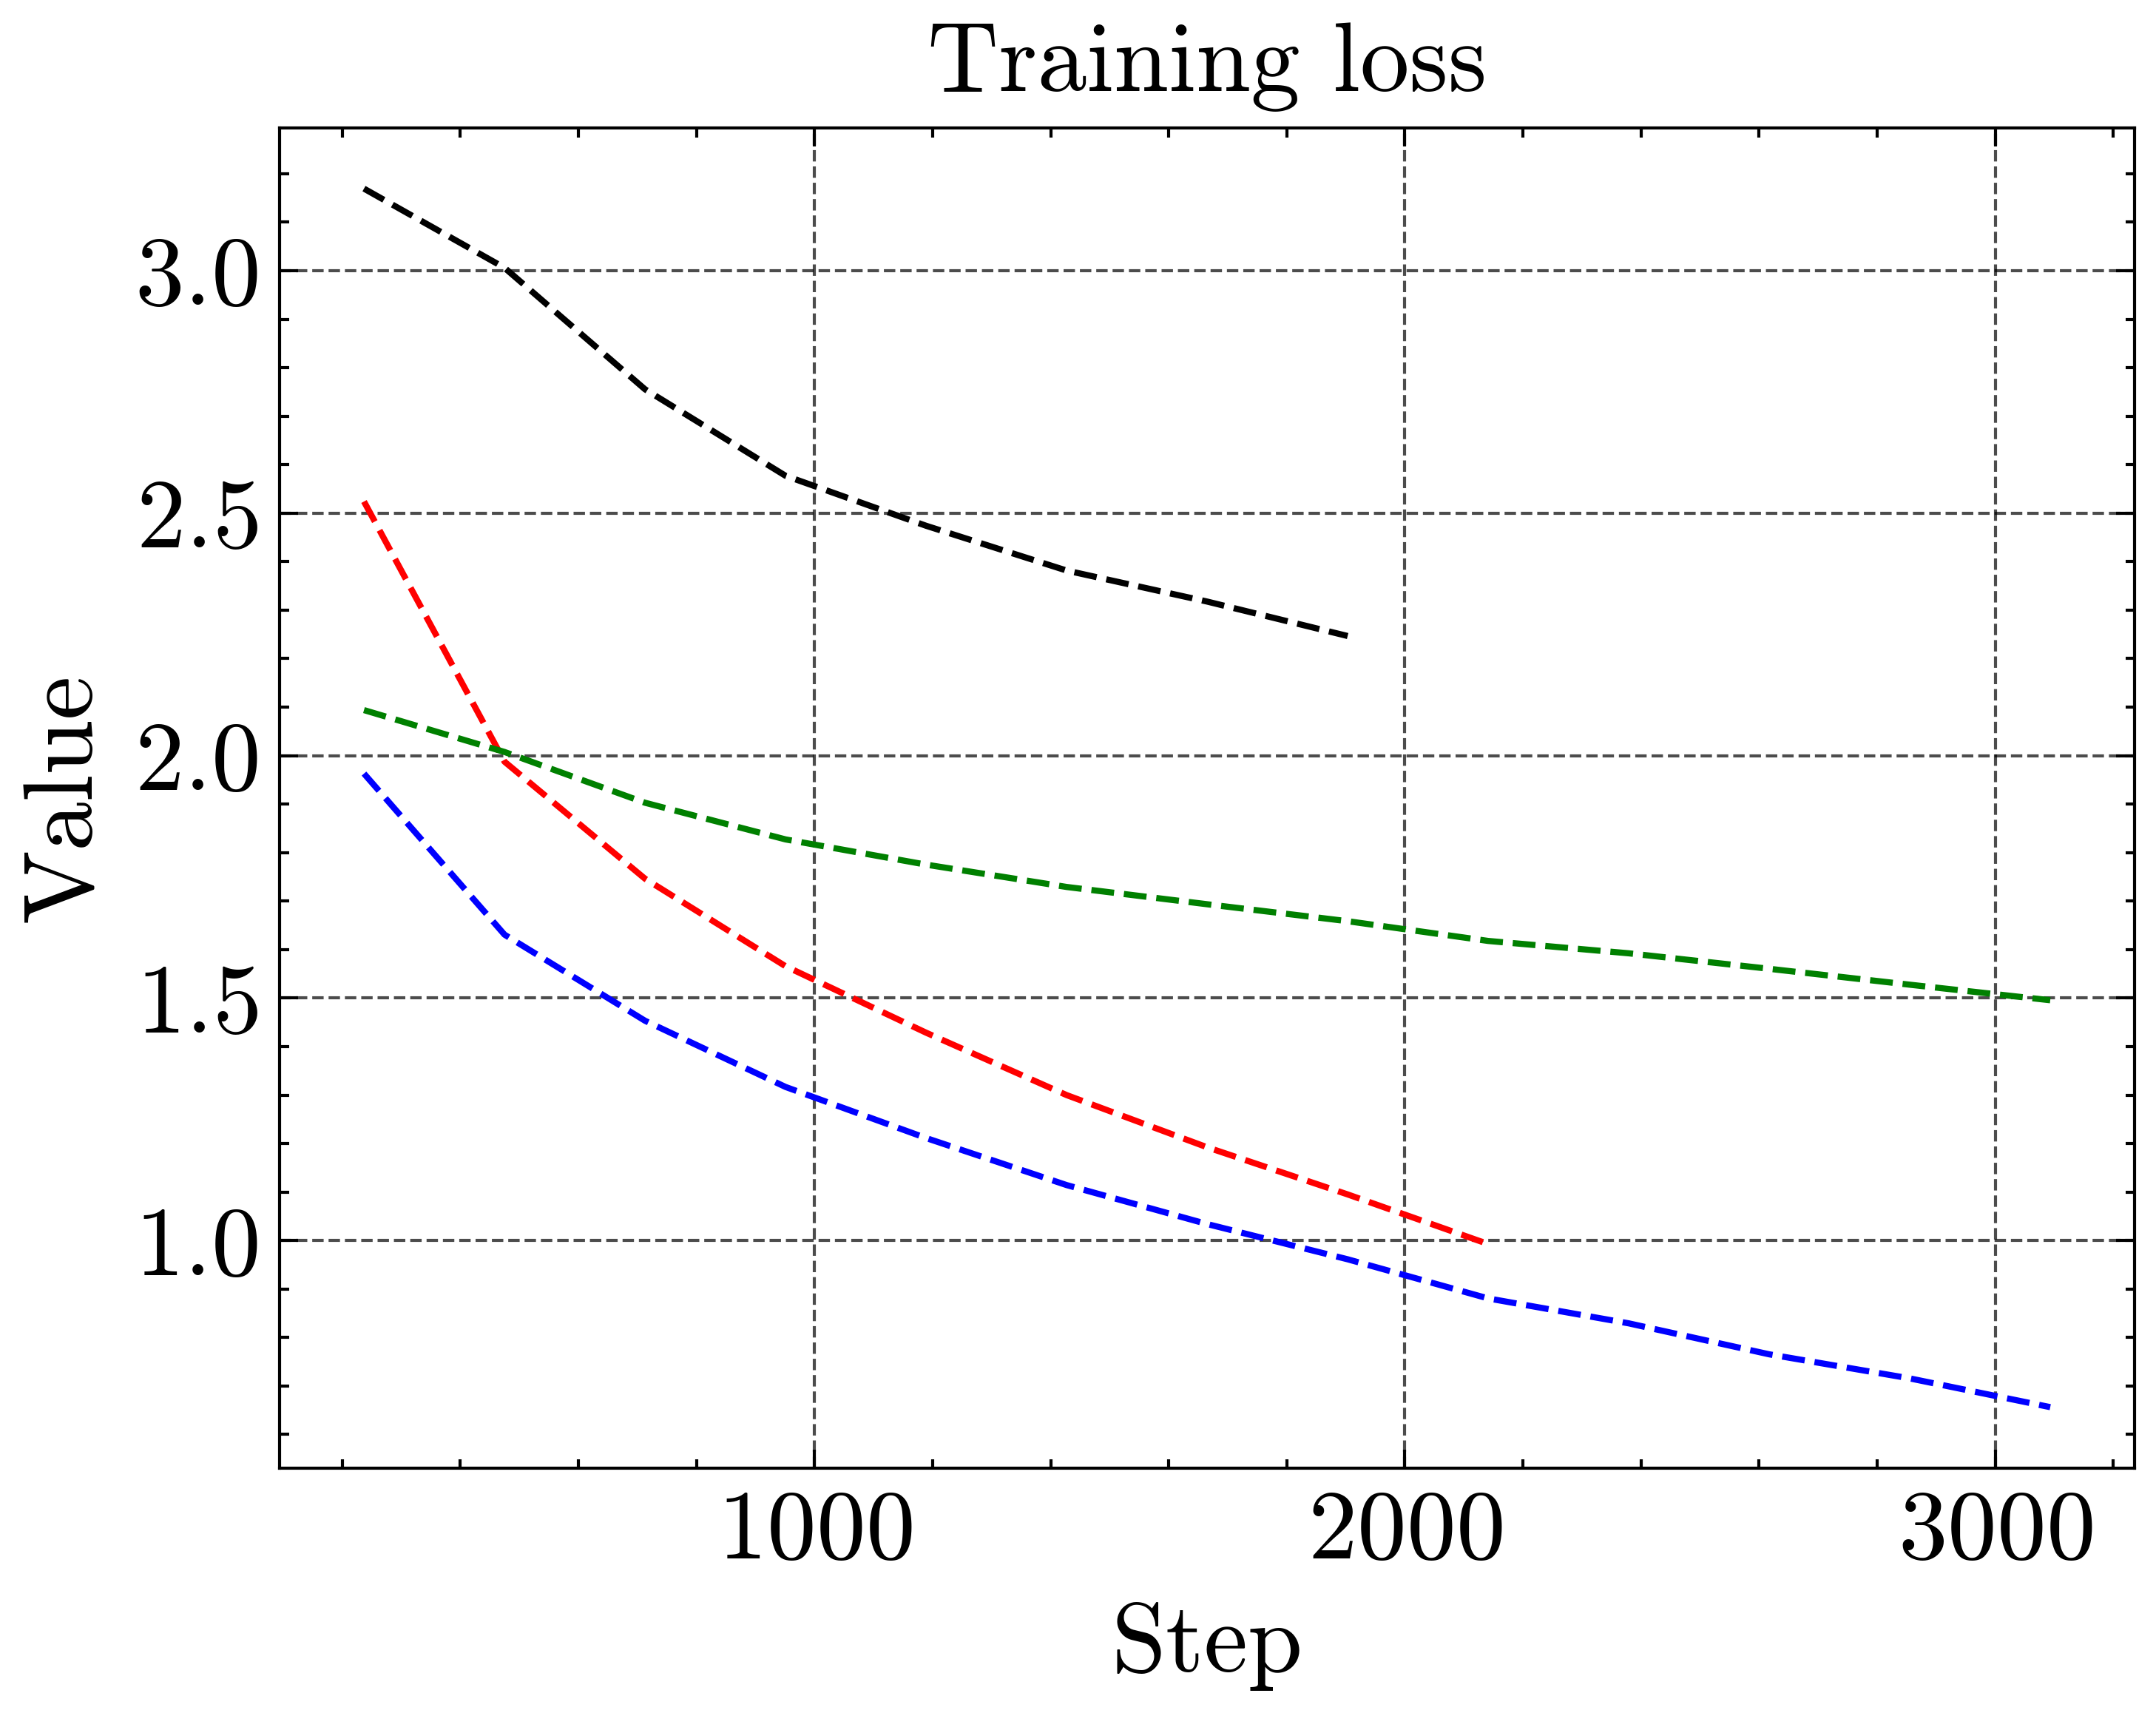

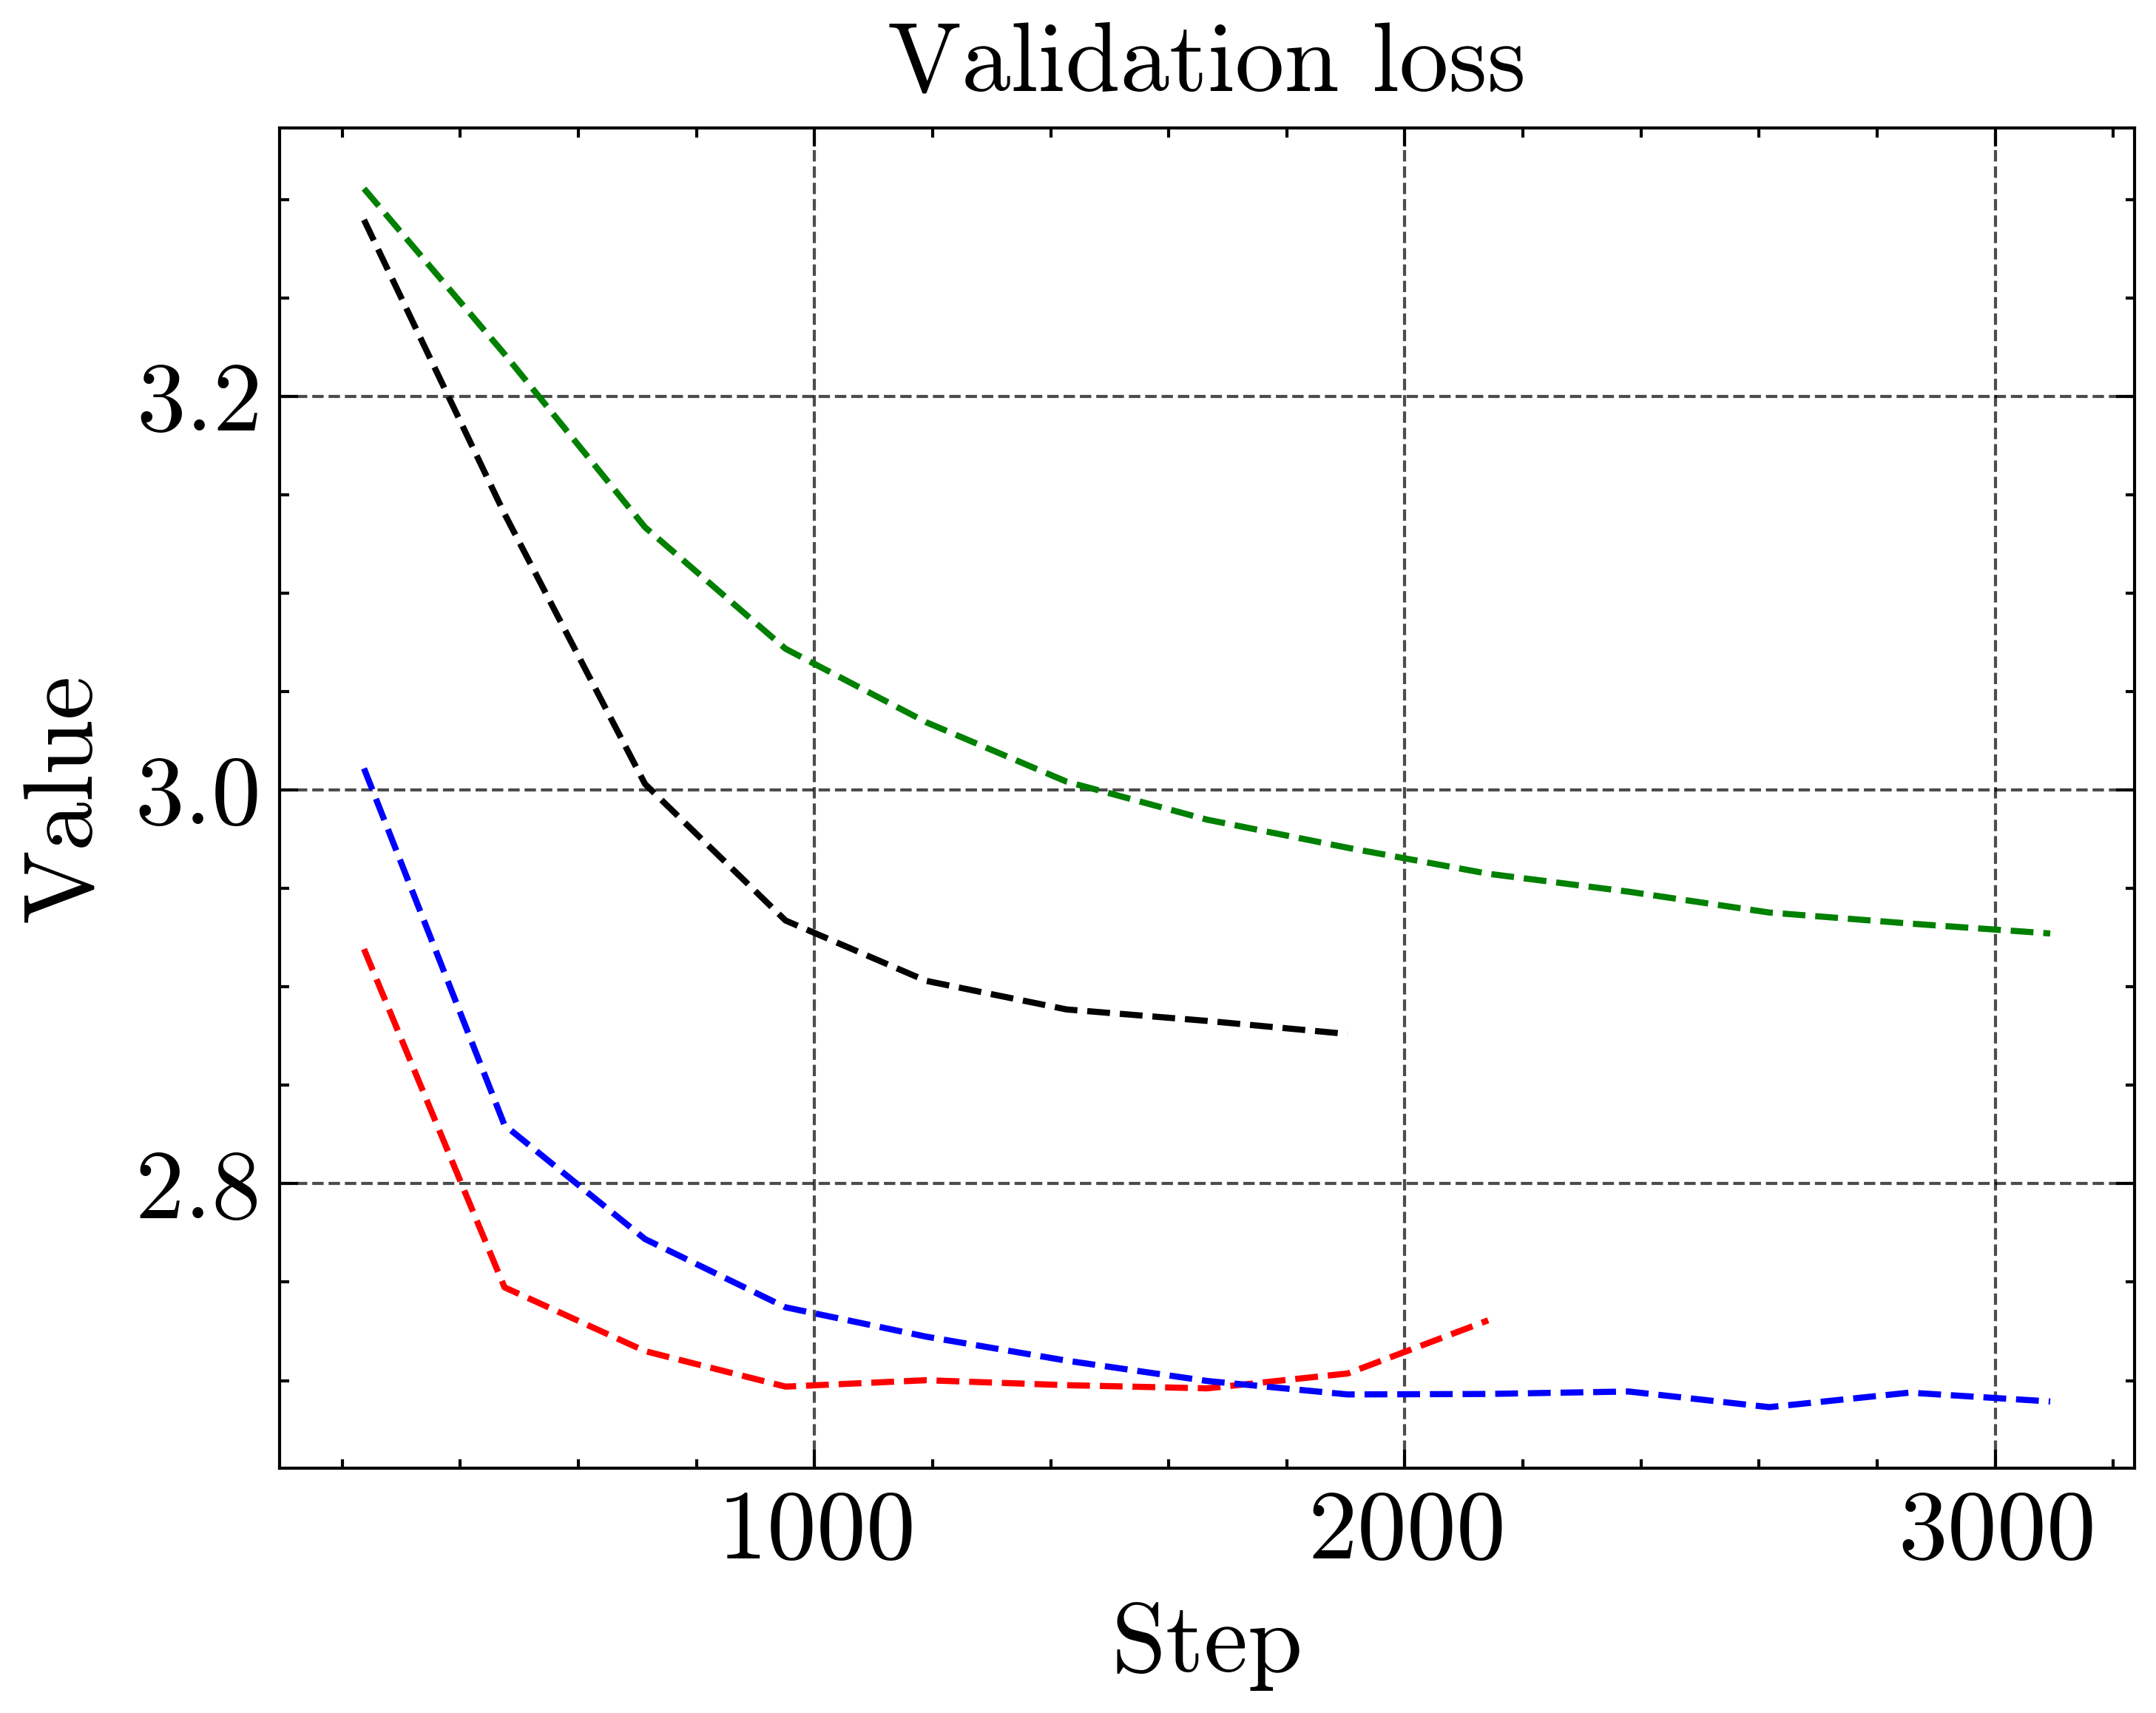

In [45]:
# Example usage
create_metric_plot(df, METRICS, Path(OUTPUT_DIR) / 'sampler')

# Random

```
run       label                                               auc       accuracy  alpha  tau
e1ff6ba8  SOTA2021-like - AdaFace (random samples) + HCL      0.865000  0.800999  0.8    0.08
d6d09a30  SOTA2021-like - AdaFace (random samples) + HCL      0.864000  0.800000  0.8    0.2
e576b9b4  SOTA2021-like - AdaFace (random samples)            0.856999  0.787999  0      0.08
6f96a736  AdaFace (random samples                             0.851999  0.782000  0.0    0.2
```

Found 12 runs after filtering
0: 13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0
1: 1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
2: 61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
3: 6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0
4: 85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0
5: 96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
6: ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0
7: b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
8: d1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightnin

Enter the indices of the runs in the desired order (e.g., 0,2,1):  3,11,9,10
Enter new name for run '6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0' (press Enter to keep current name):  Random ($\tau = 0.2$)
Enter new name for run 'e576b9b4 scl:train 2024-09-19 08:57:44 SOTA2021-like - AdaFace (random samples)/exp/lightning_logs/version_0' (press Enter to keep current name):  Random ($\tau = 0.08$)
Enter new name for run 'd6d09a30 scl:train 2024-09-19 12:12:50 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Random + HCL ($\tau = 0.2$)
Enter new name for run 'e1ff6ba8 scl:train 2024-09-19 09:14:37 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Random + HCL ($\tau = 0.08$)


Renamed runs: {'6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0': 'Random ($\\tau = 0.2$)', 'e576b9b4 scl:train 2024-09-19 08:57:44 SOTA2021-like - AdaFace (random samples)/exp/lightning_logs/version_0': 'Random ($\\tau = 0.08$)', 'd6d09a30 scl:train 2024-09-19 12:12:50 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0': 'Random + HCL ($\\tau = 0.2$)', 'e1ff6ba8 scl:train 2024-09-19 09:14:37 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0': 'Random + HCL ($\\tau = 0.08$)'}
accuracy fetched for run Random ($\tau = 0.2$)
auc fetched for run Random ($\tau = 0.2$)
loss/train fetched for run Random ($\tau = 0.2$)
loss/val fetched for run Random ($\tau = 0.2$)
accuracy fetched for run Random ($\tau = 0.08$)
auc fetched for run Random ($\tau = 0.08$)
loss/train fetched for run Random ($\tau = 0.08$)
loss/val fetched for run Random ($\tau = 0.08$)
accuracy fetched for run Random + HCL ($\tau = 0.2

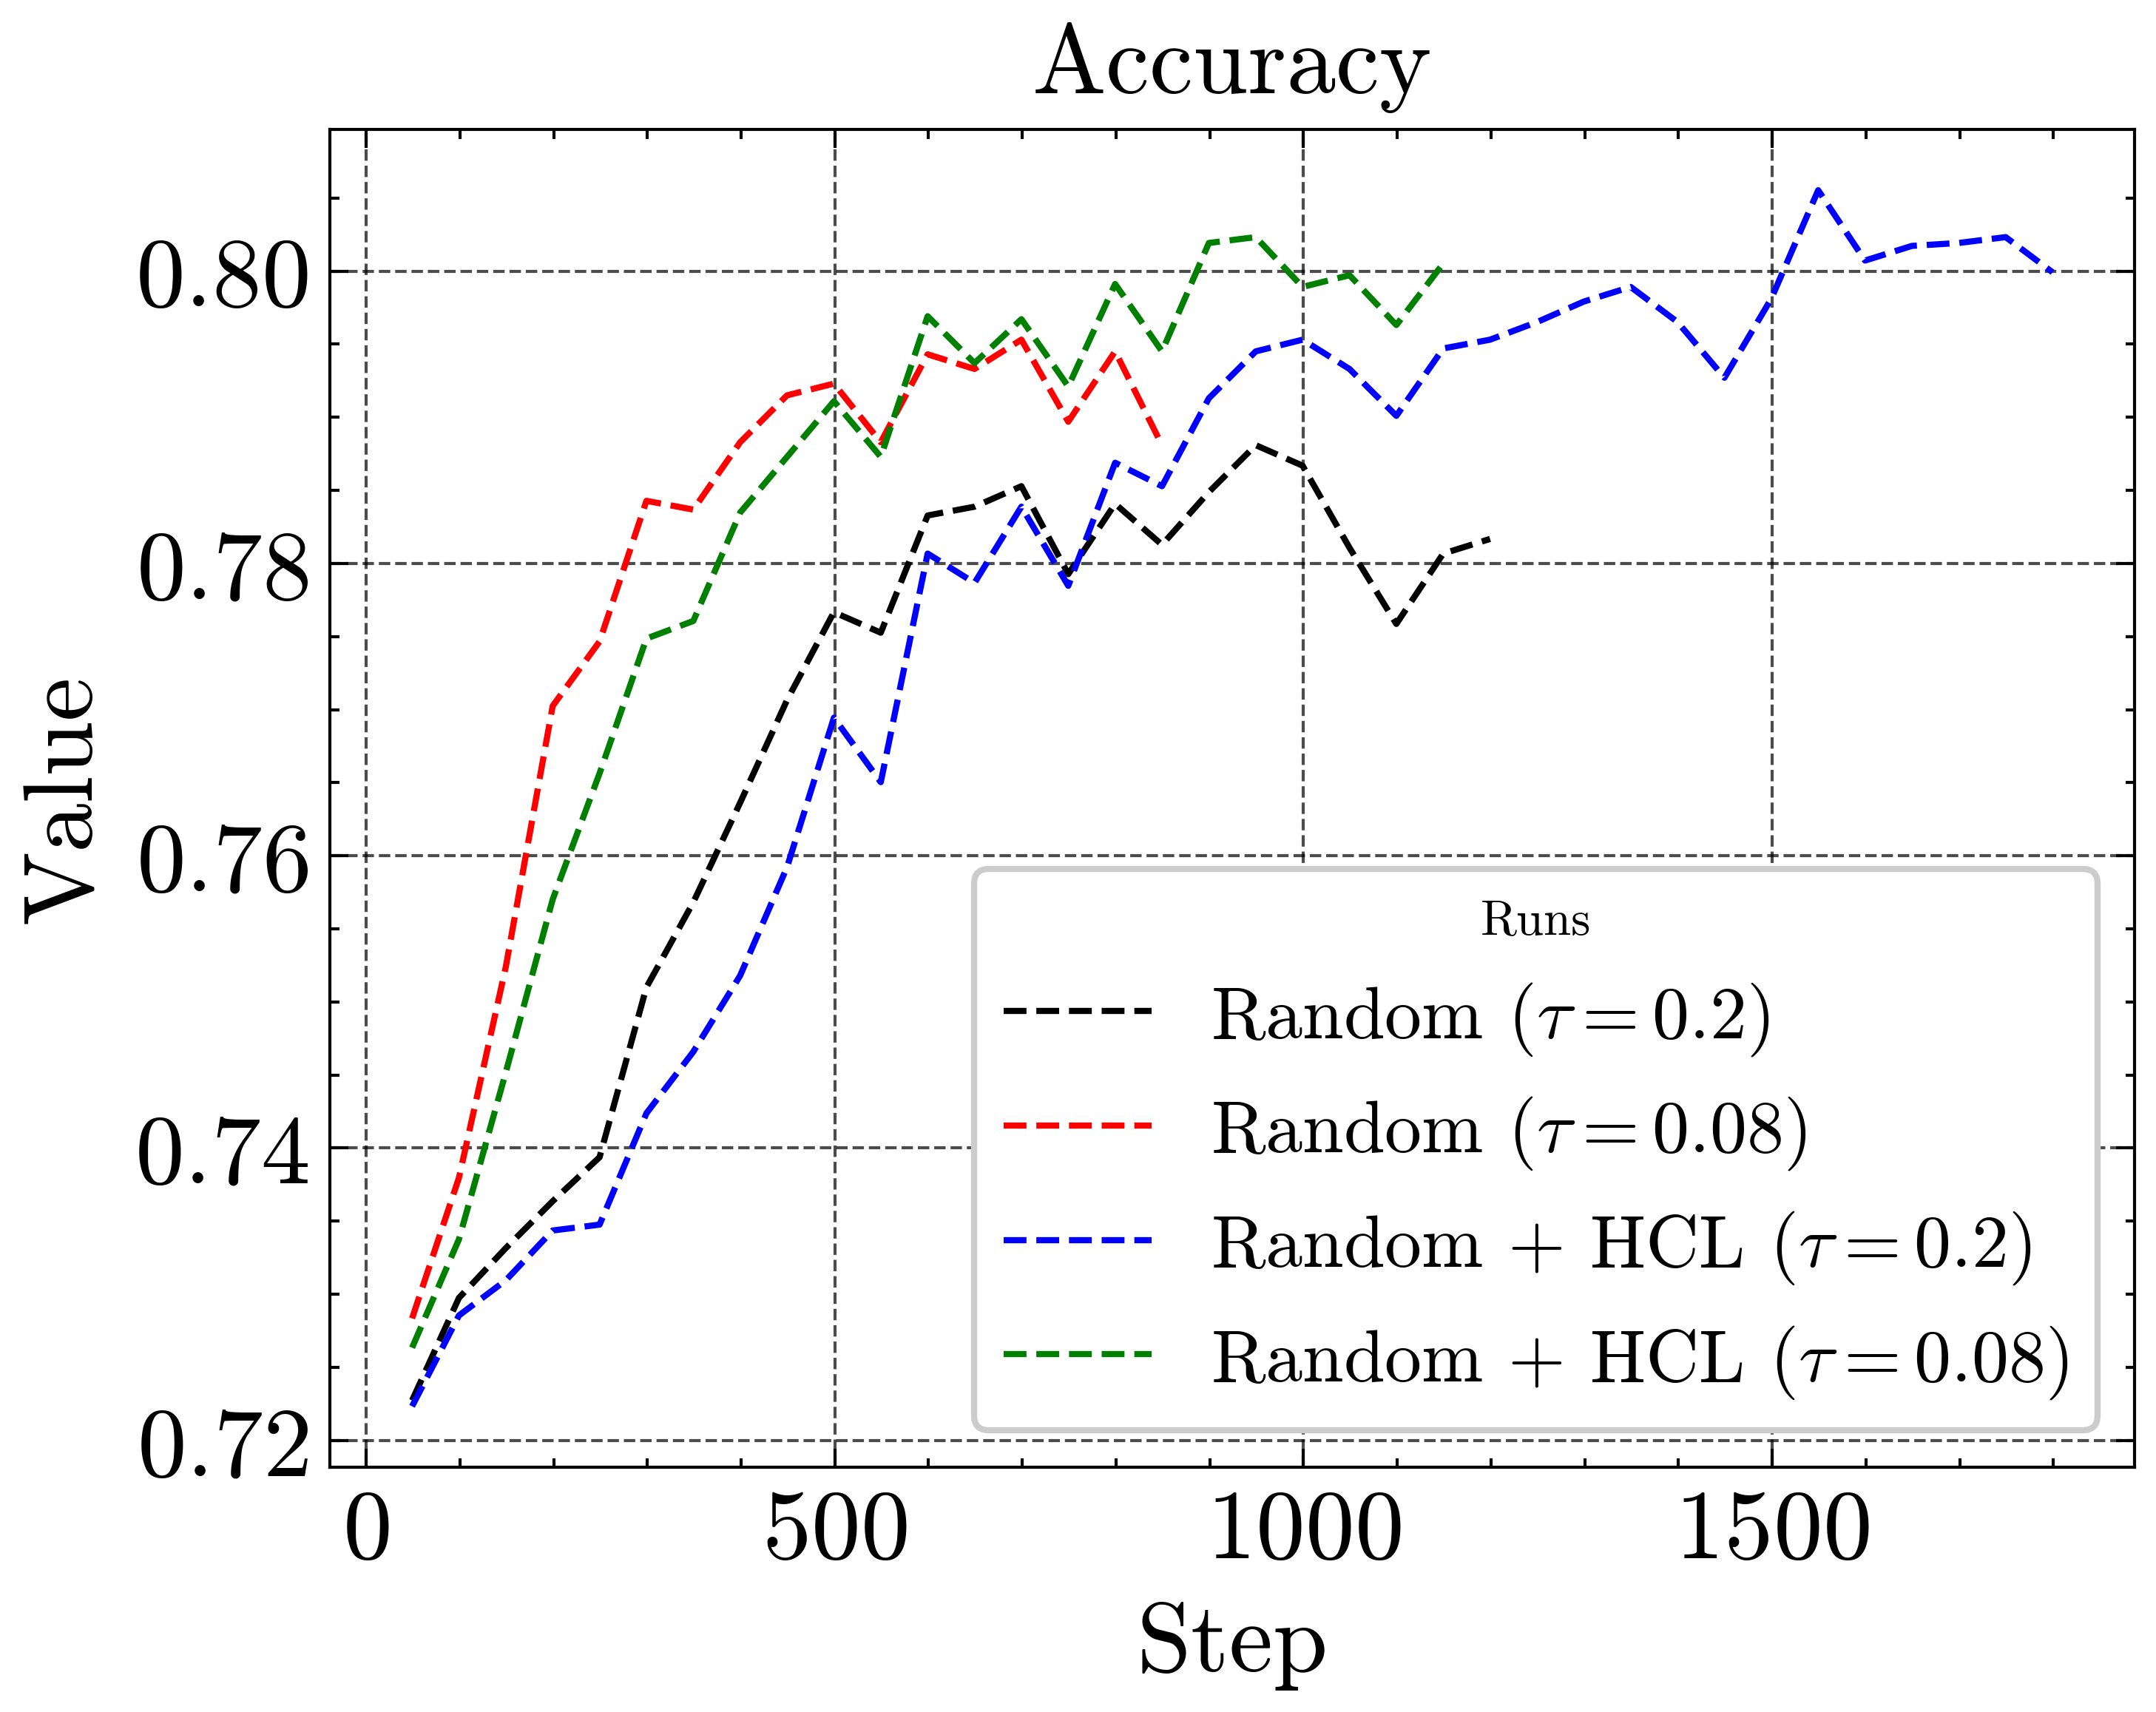

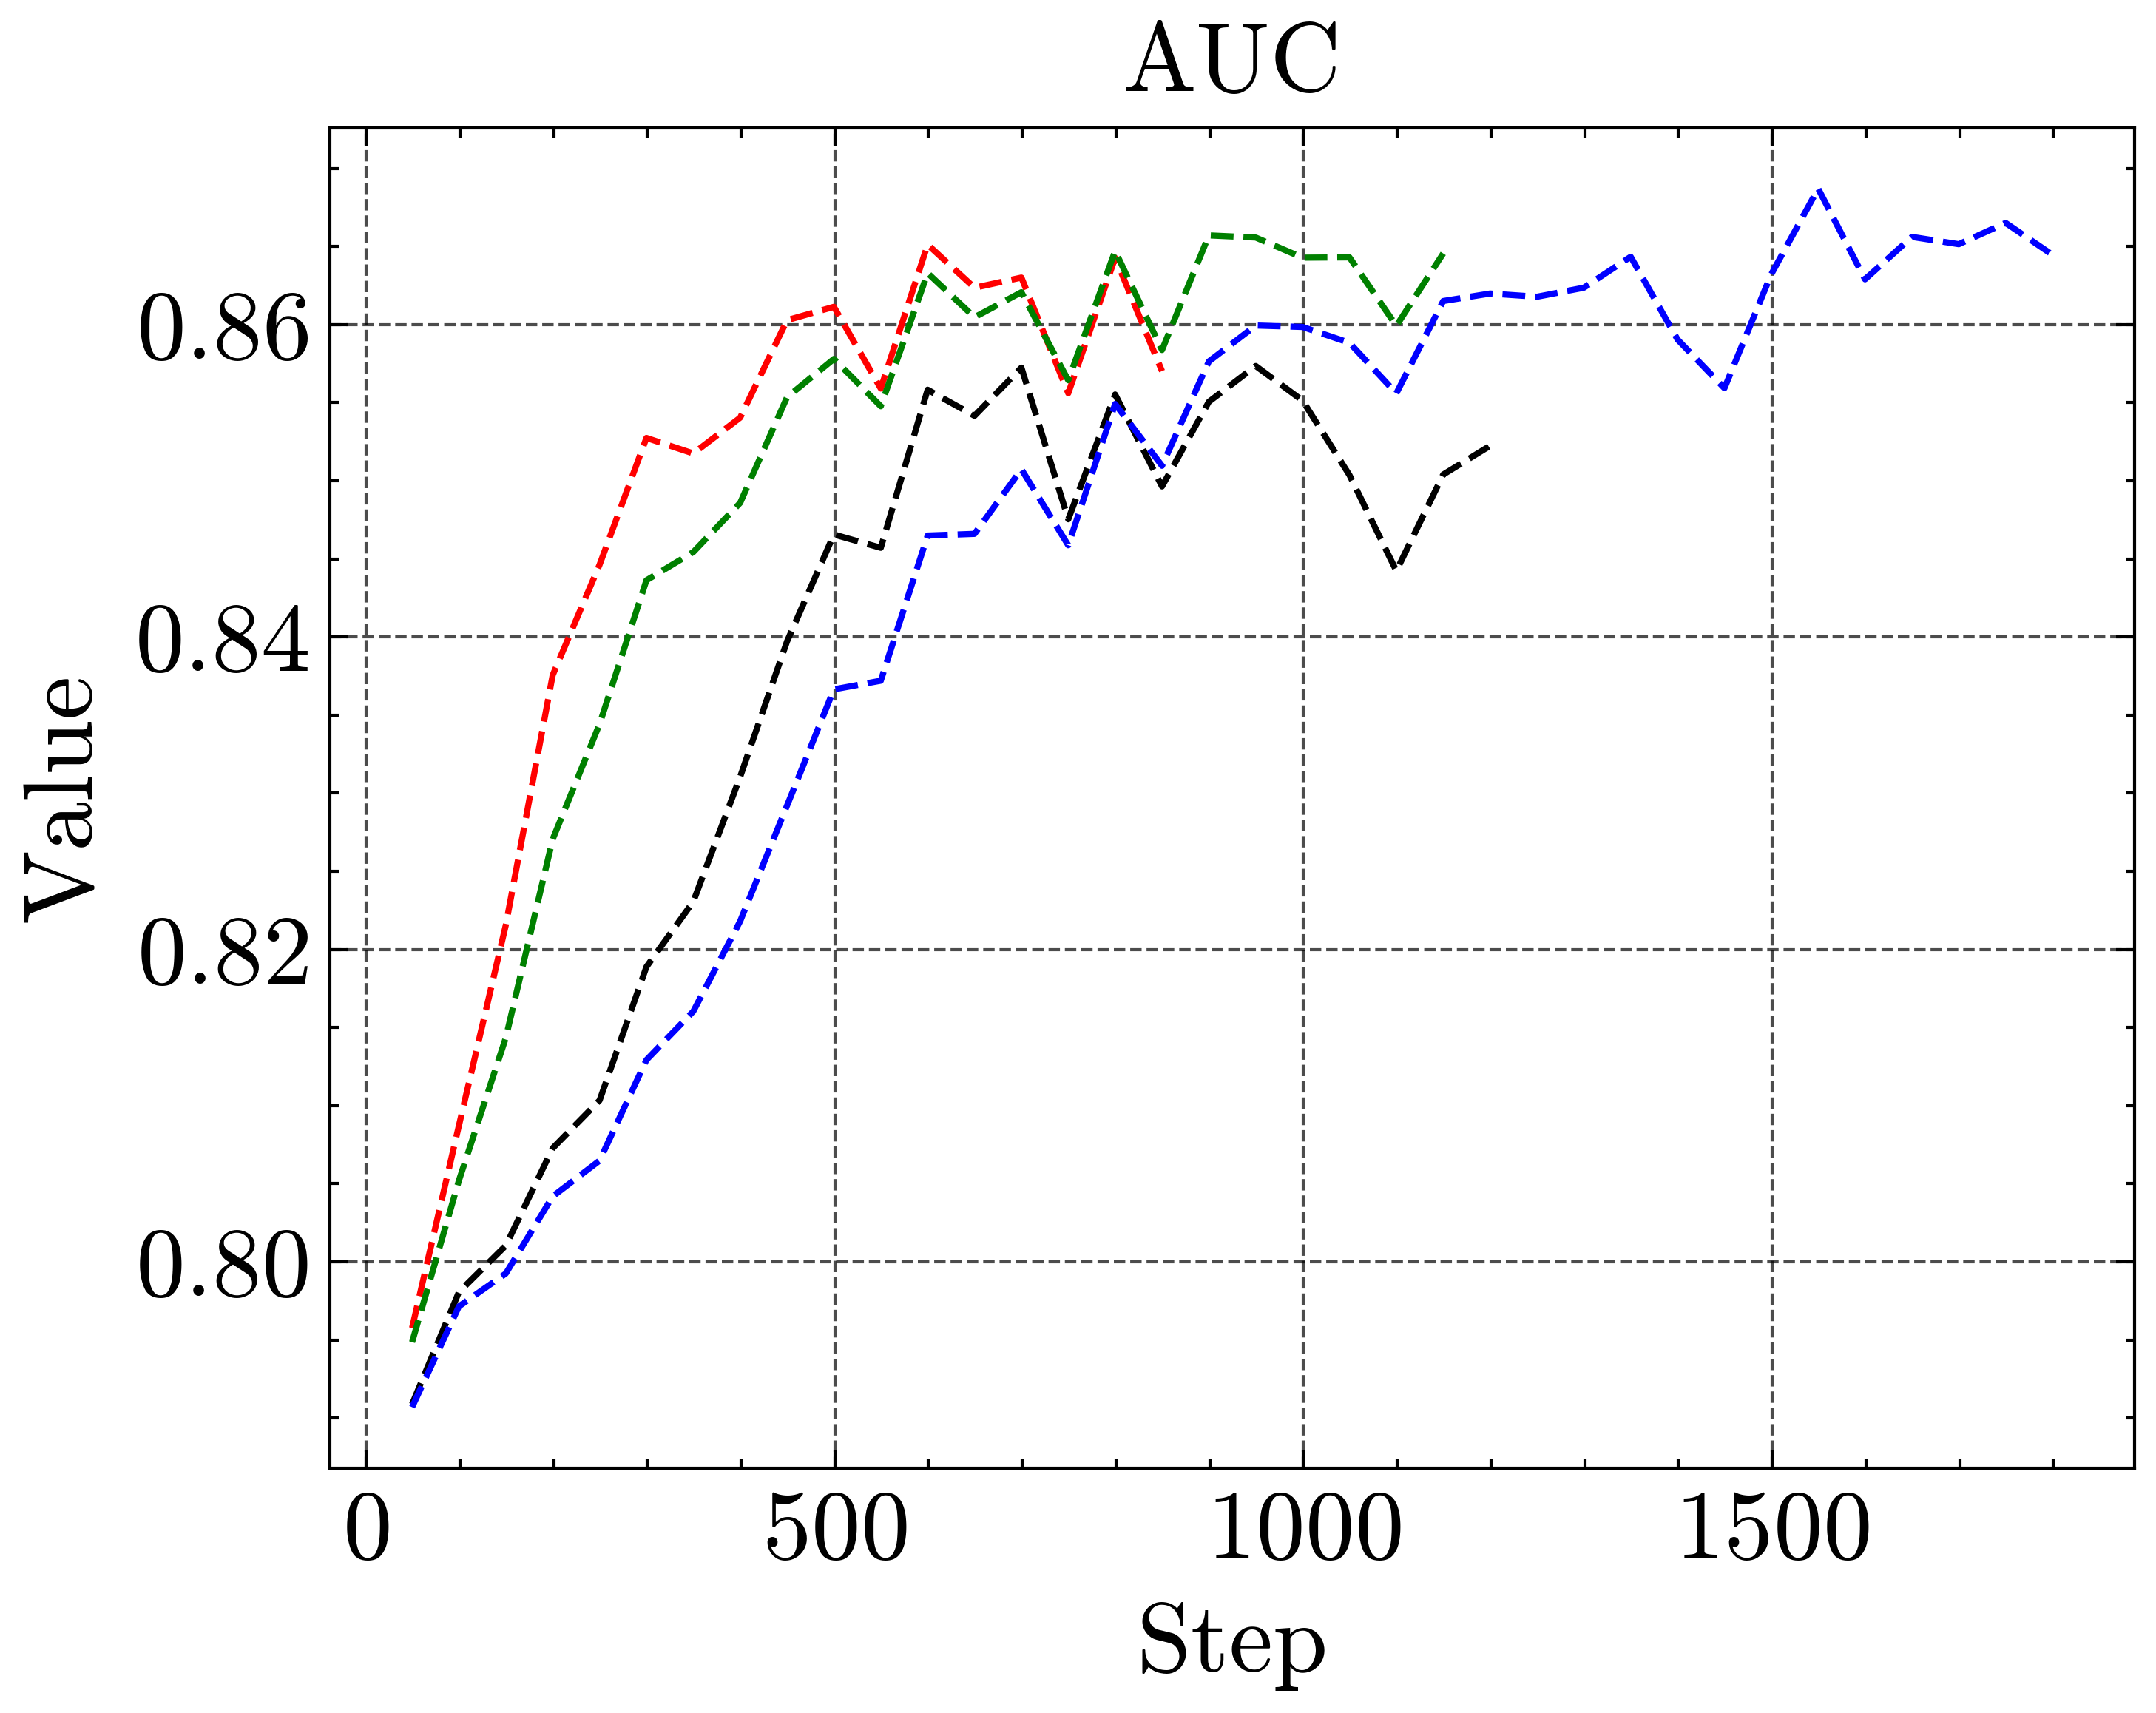

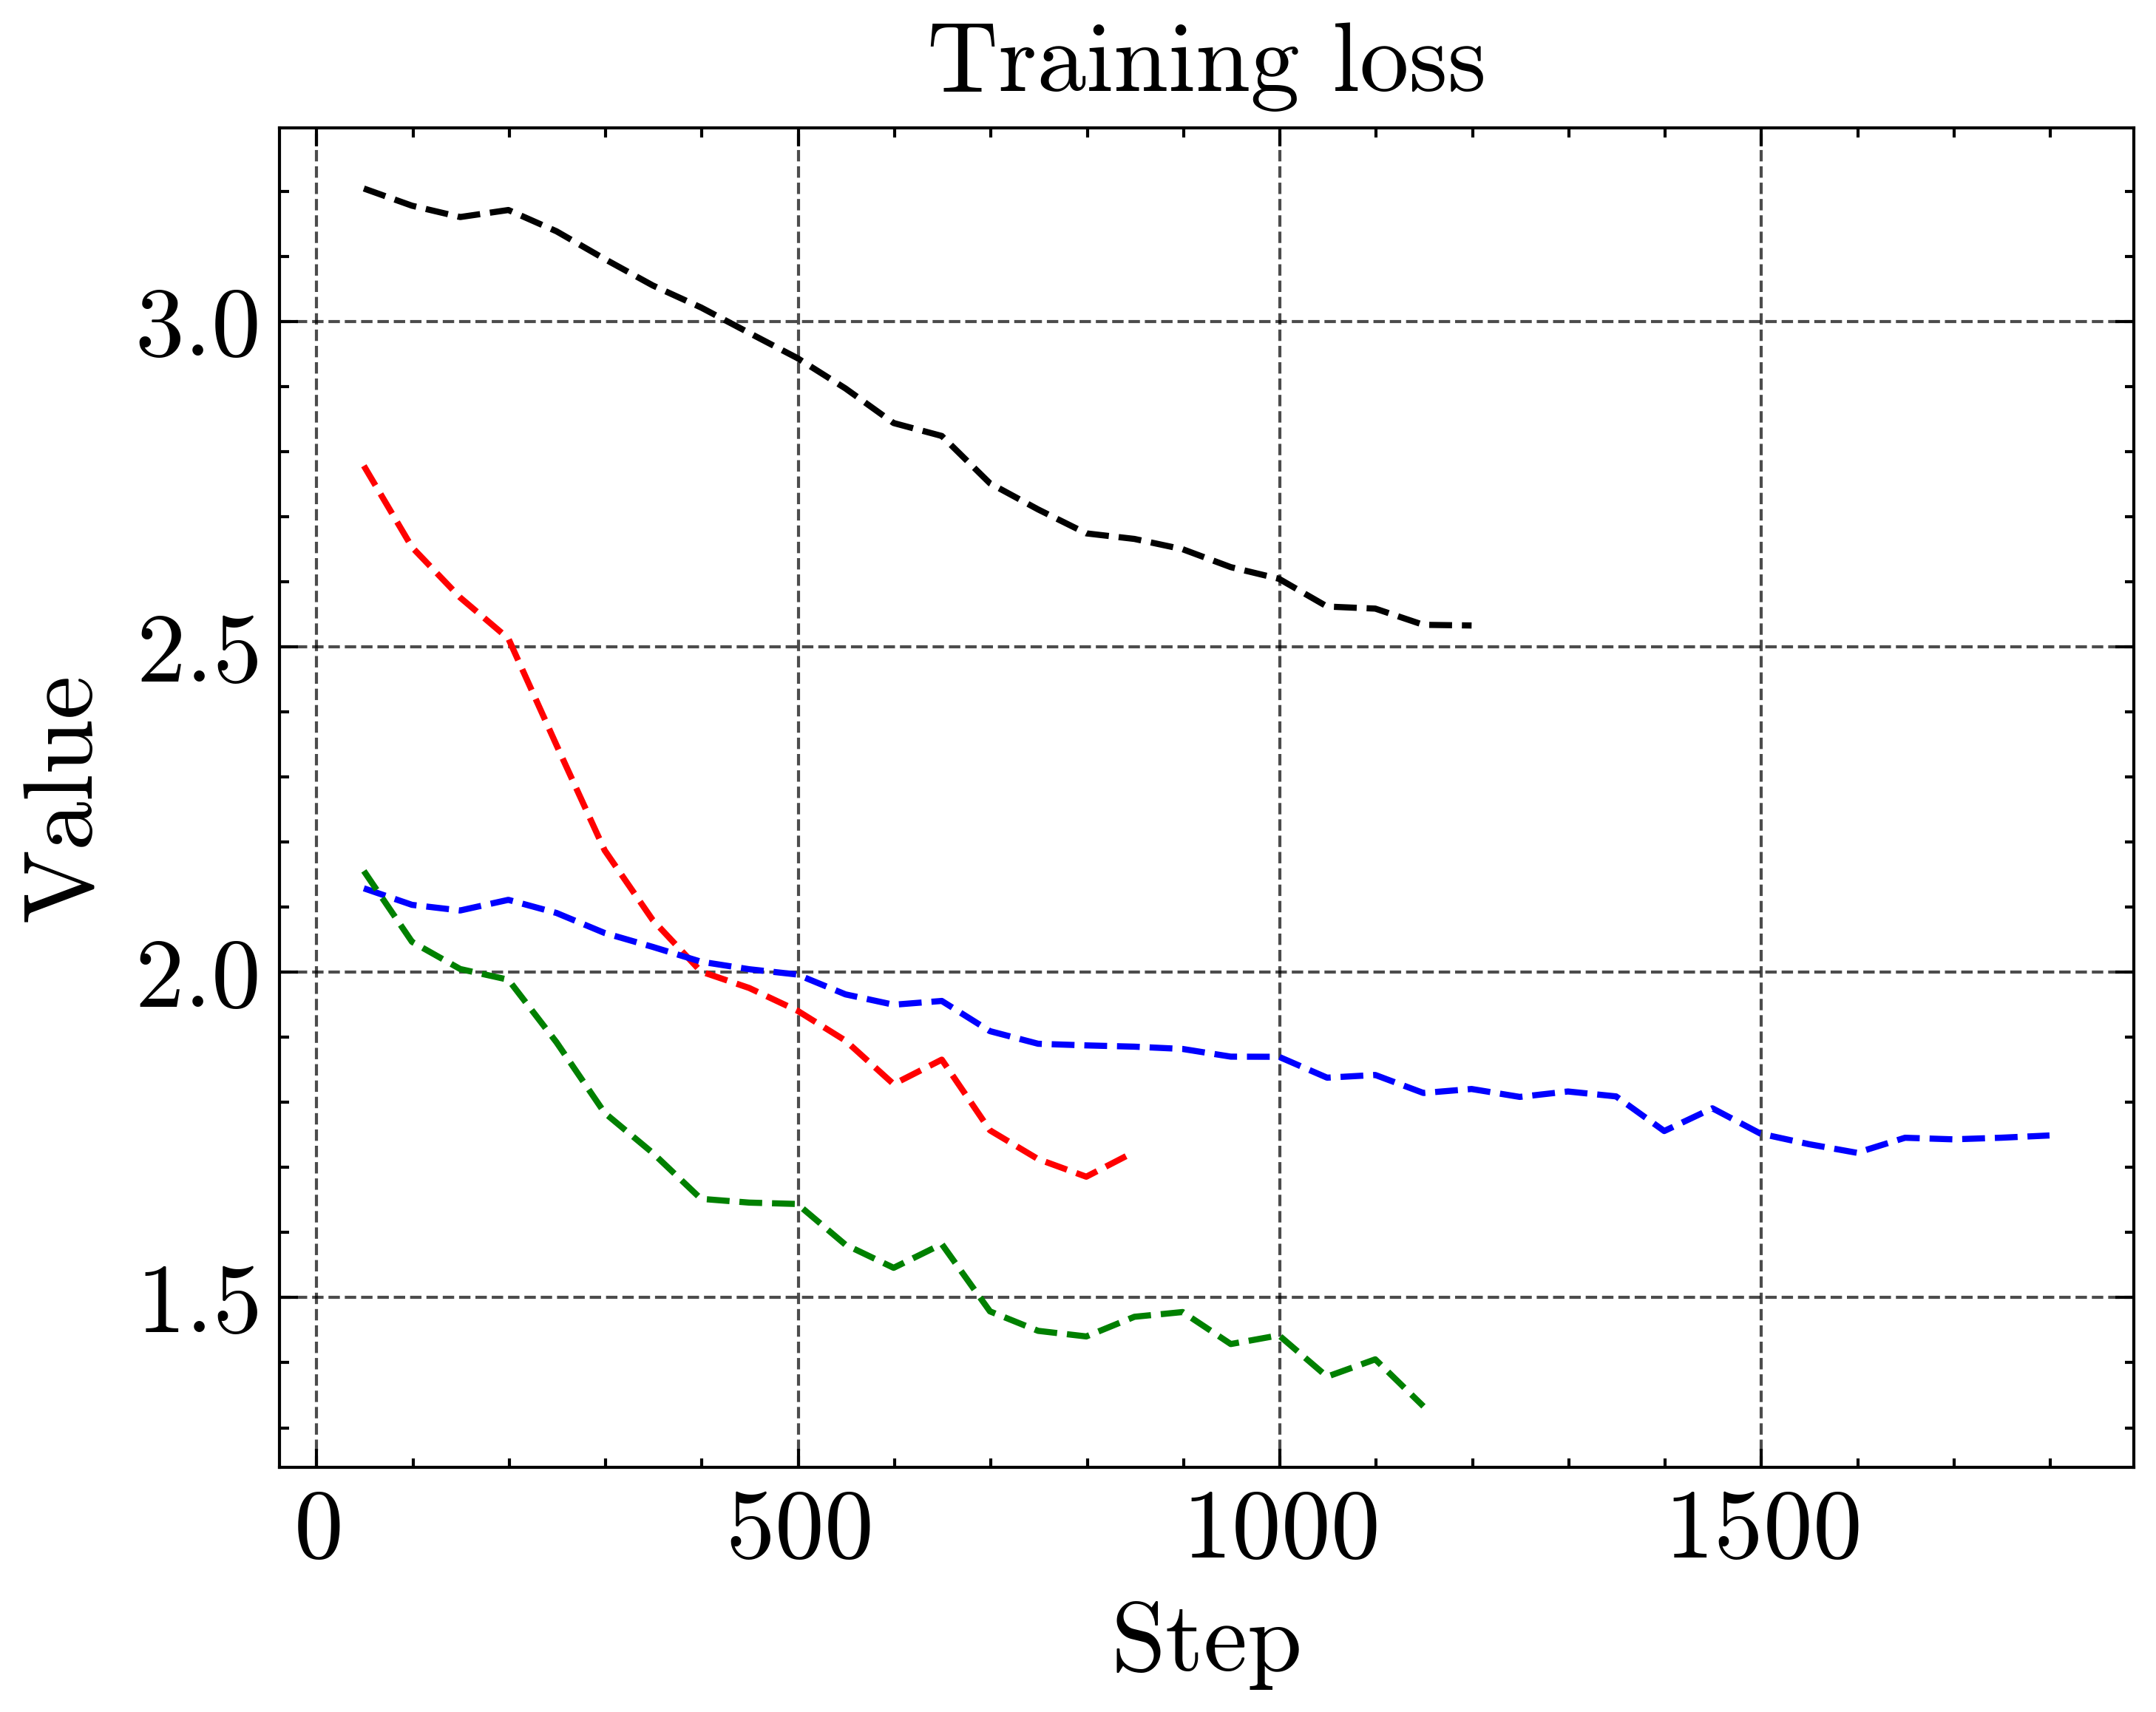

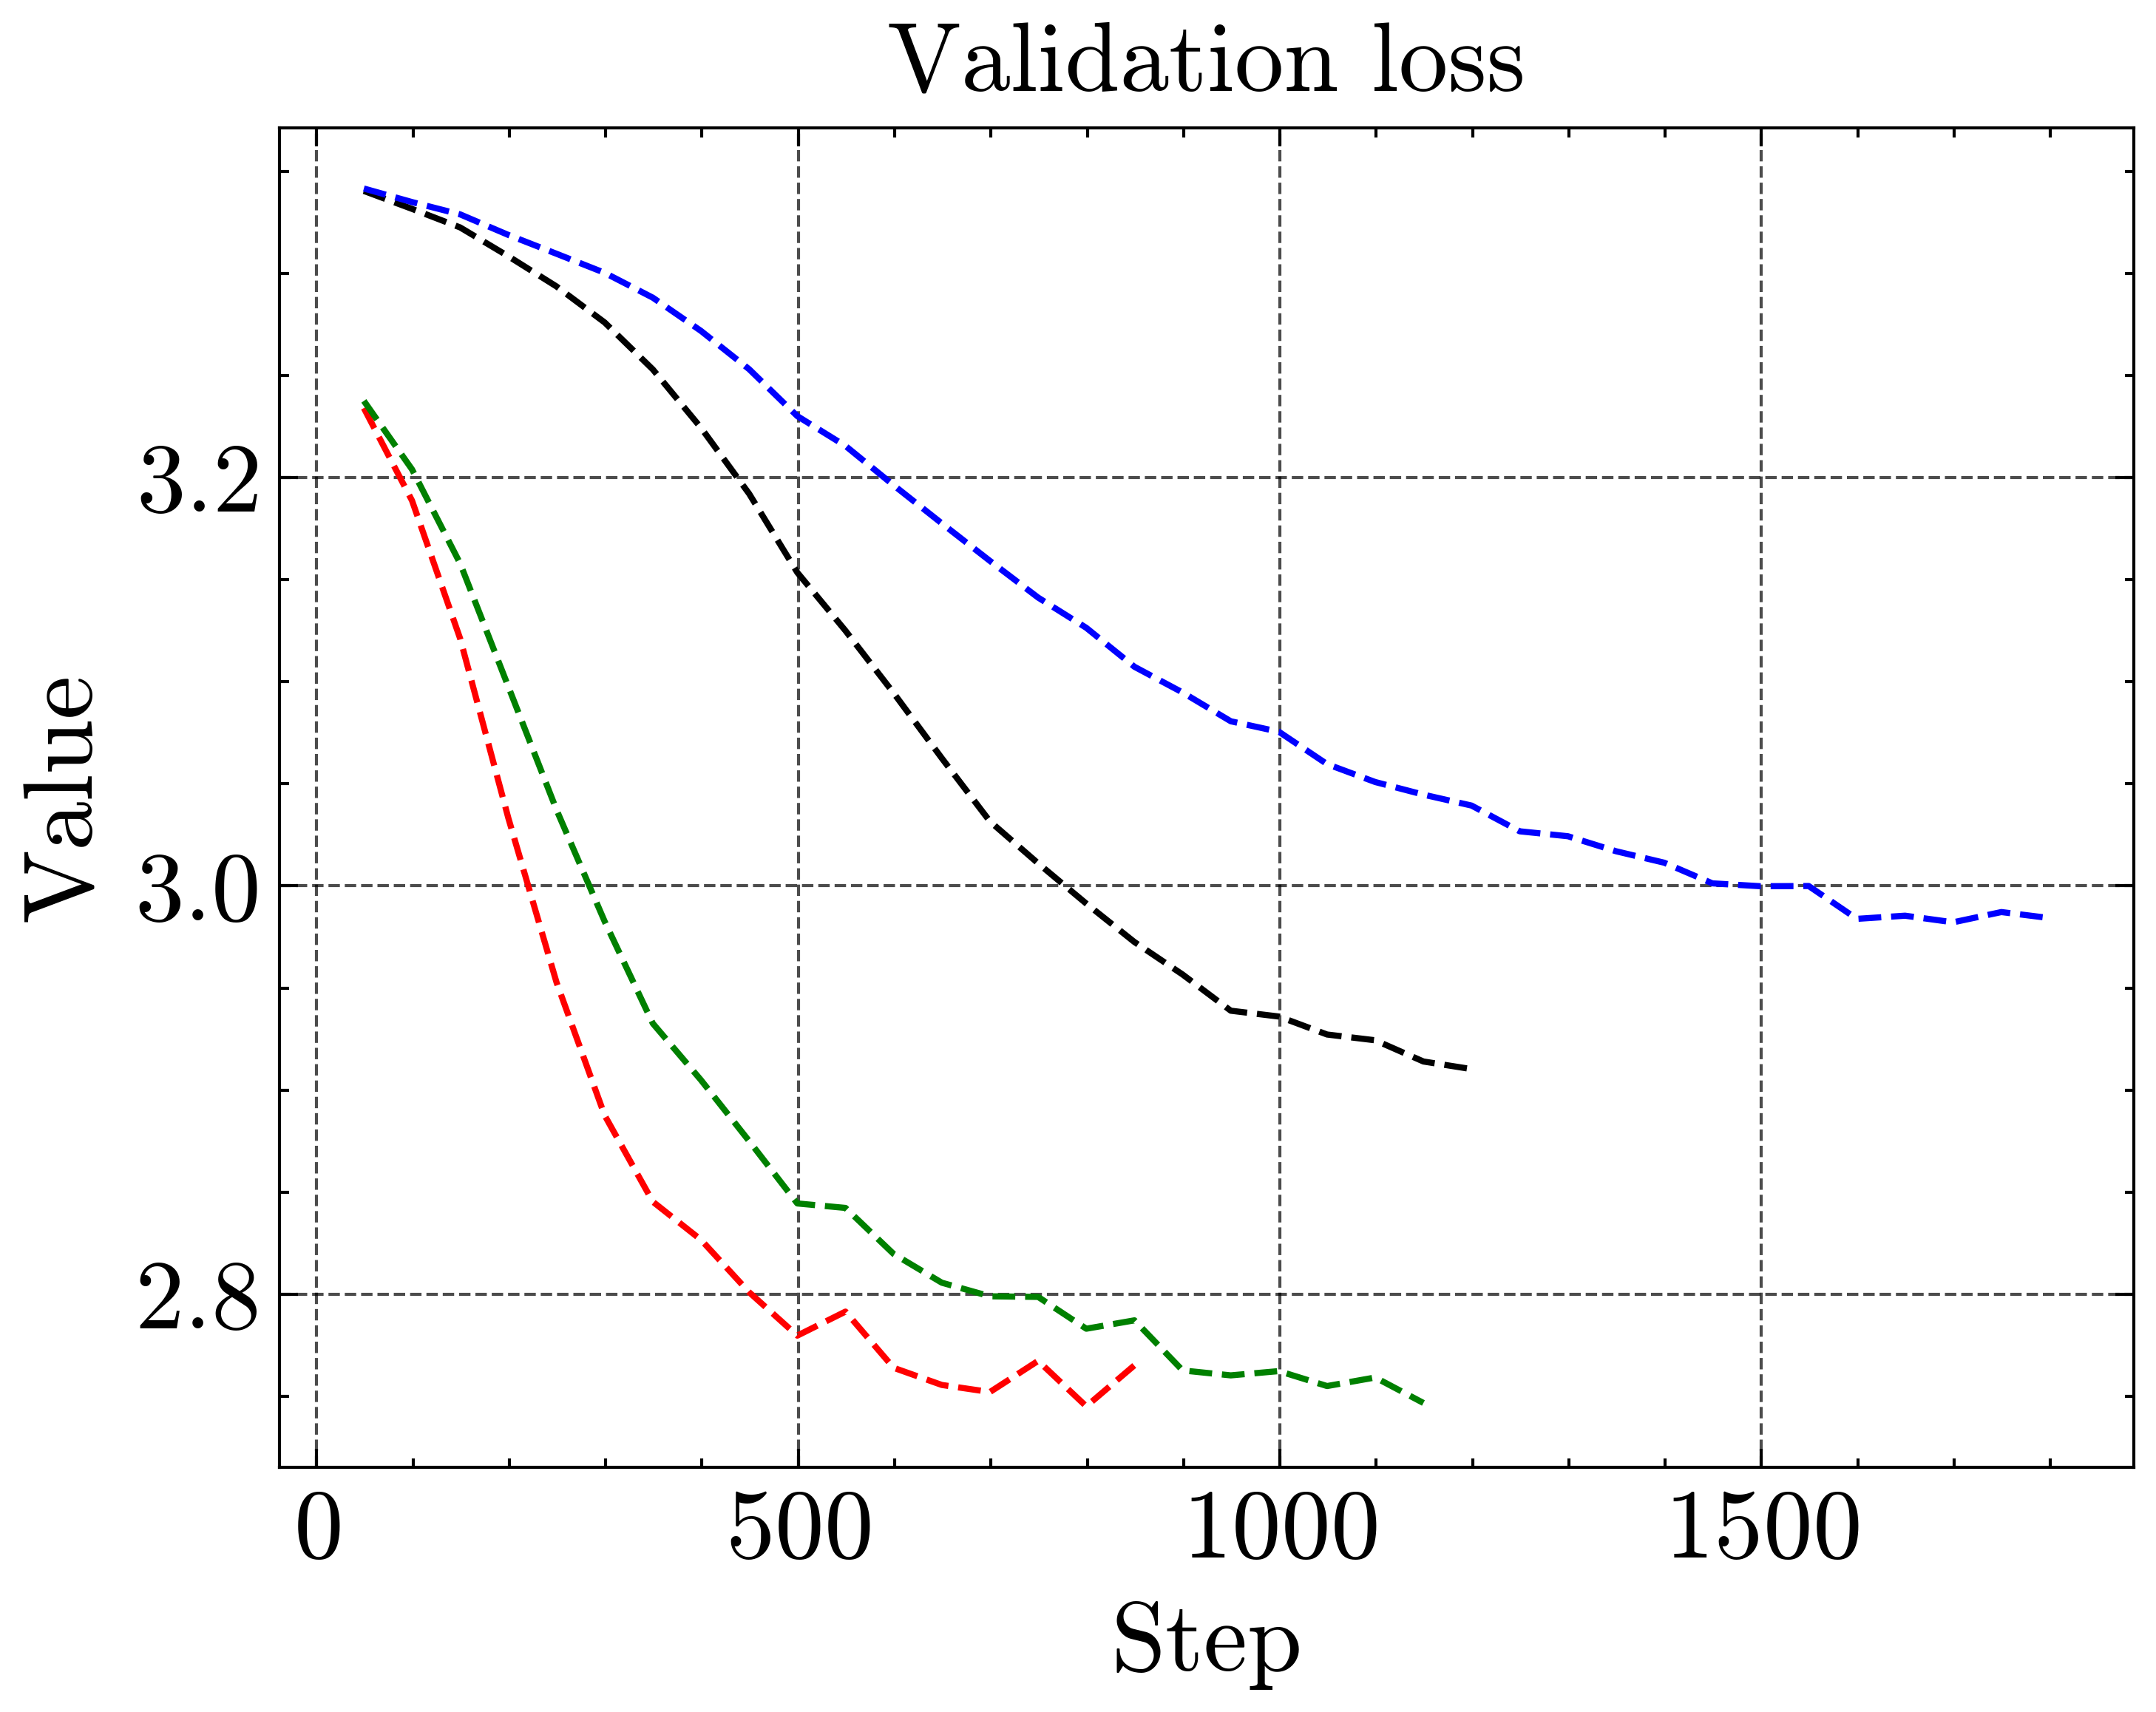

In [46]:
renamed_runs = prepare_runs(TENSORBOARD_URL)
df = fetch_and_process_metrics(renamed_runs, METRICS, TENSORBOARD_URL)
create_metric_plot(df, METRICS, Path(OUTPUT_DIR) / 'random')

# Sequential

```
run       label                                               auc       accuracy  alpha  tau
13da2f02  AdaFace (sequential samples)                        0.861999  0.795000  0.0    0.2
ade621a9  SOTA2021-like - AdaFace (sequential samples)        0.856000  0.788999  0.0    0.08
96b898ab  SOTA2021-like - AdaFace (sequential samples) + HCL  0.853999  0.786000  0.8    0.2
1fa6cde1  SOTA2021-like - AdaFace (sequential samples) + HCL  0.845000  0.776000  0.8    0.08
```


Found 12 runs after filtering
0: 13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0
1: 1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
2: 61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
3: 6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0
4: 85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0
5: 96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0
6: ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0
7: b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0
8: d1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightnin

Enter the indices of the runs in the desired order (e.g., 0,2,1):  1,5,6,0
Enter new name for run '1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Sequential + HCL ($\tau = 0.08$)
Enter new name for run '96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0' (press Enter to keep current name):  Sequential + HCL ($\tau = 0.2$)
Enter new name for run 'ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0' (press Enter to keep current name):  Sequential ($\tau = 0.08$)
Enter new name for run '13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0' (press Enter to keep current name):  Sequential ($\tau = 0.2$)


Renamed runs: {'1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0': 'Sequential + HCL ($\\tau = 0.08$)', '96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0': 'Sequential + HCL ($\\tau = 0.2$)', 'ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0': 'Sequential ($\\tau = 0.08$)', '13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0': 'Sequential ($\\tau = 0.2$)'}
accuracy fetched for run Sequential + HCL ($\tau = 0.08$)
auc fetched for run Sequential + HCL ($\tau = 0.08$)
loss/train fetched for run Sequential + HCL ($\tau = 0.08$)
loss/val fetched for run Sequential + HCL ($\tau = 0.08$)
accuracy fetched for run Sequential + HCL ($\tau = 0.2$)
auc fetched for run Sequential + HCL ($\tau = 0.2$)
loss/train fetched for run Sequential + HCL ($\tau = 

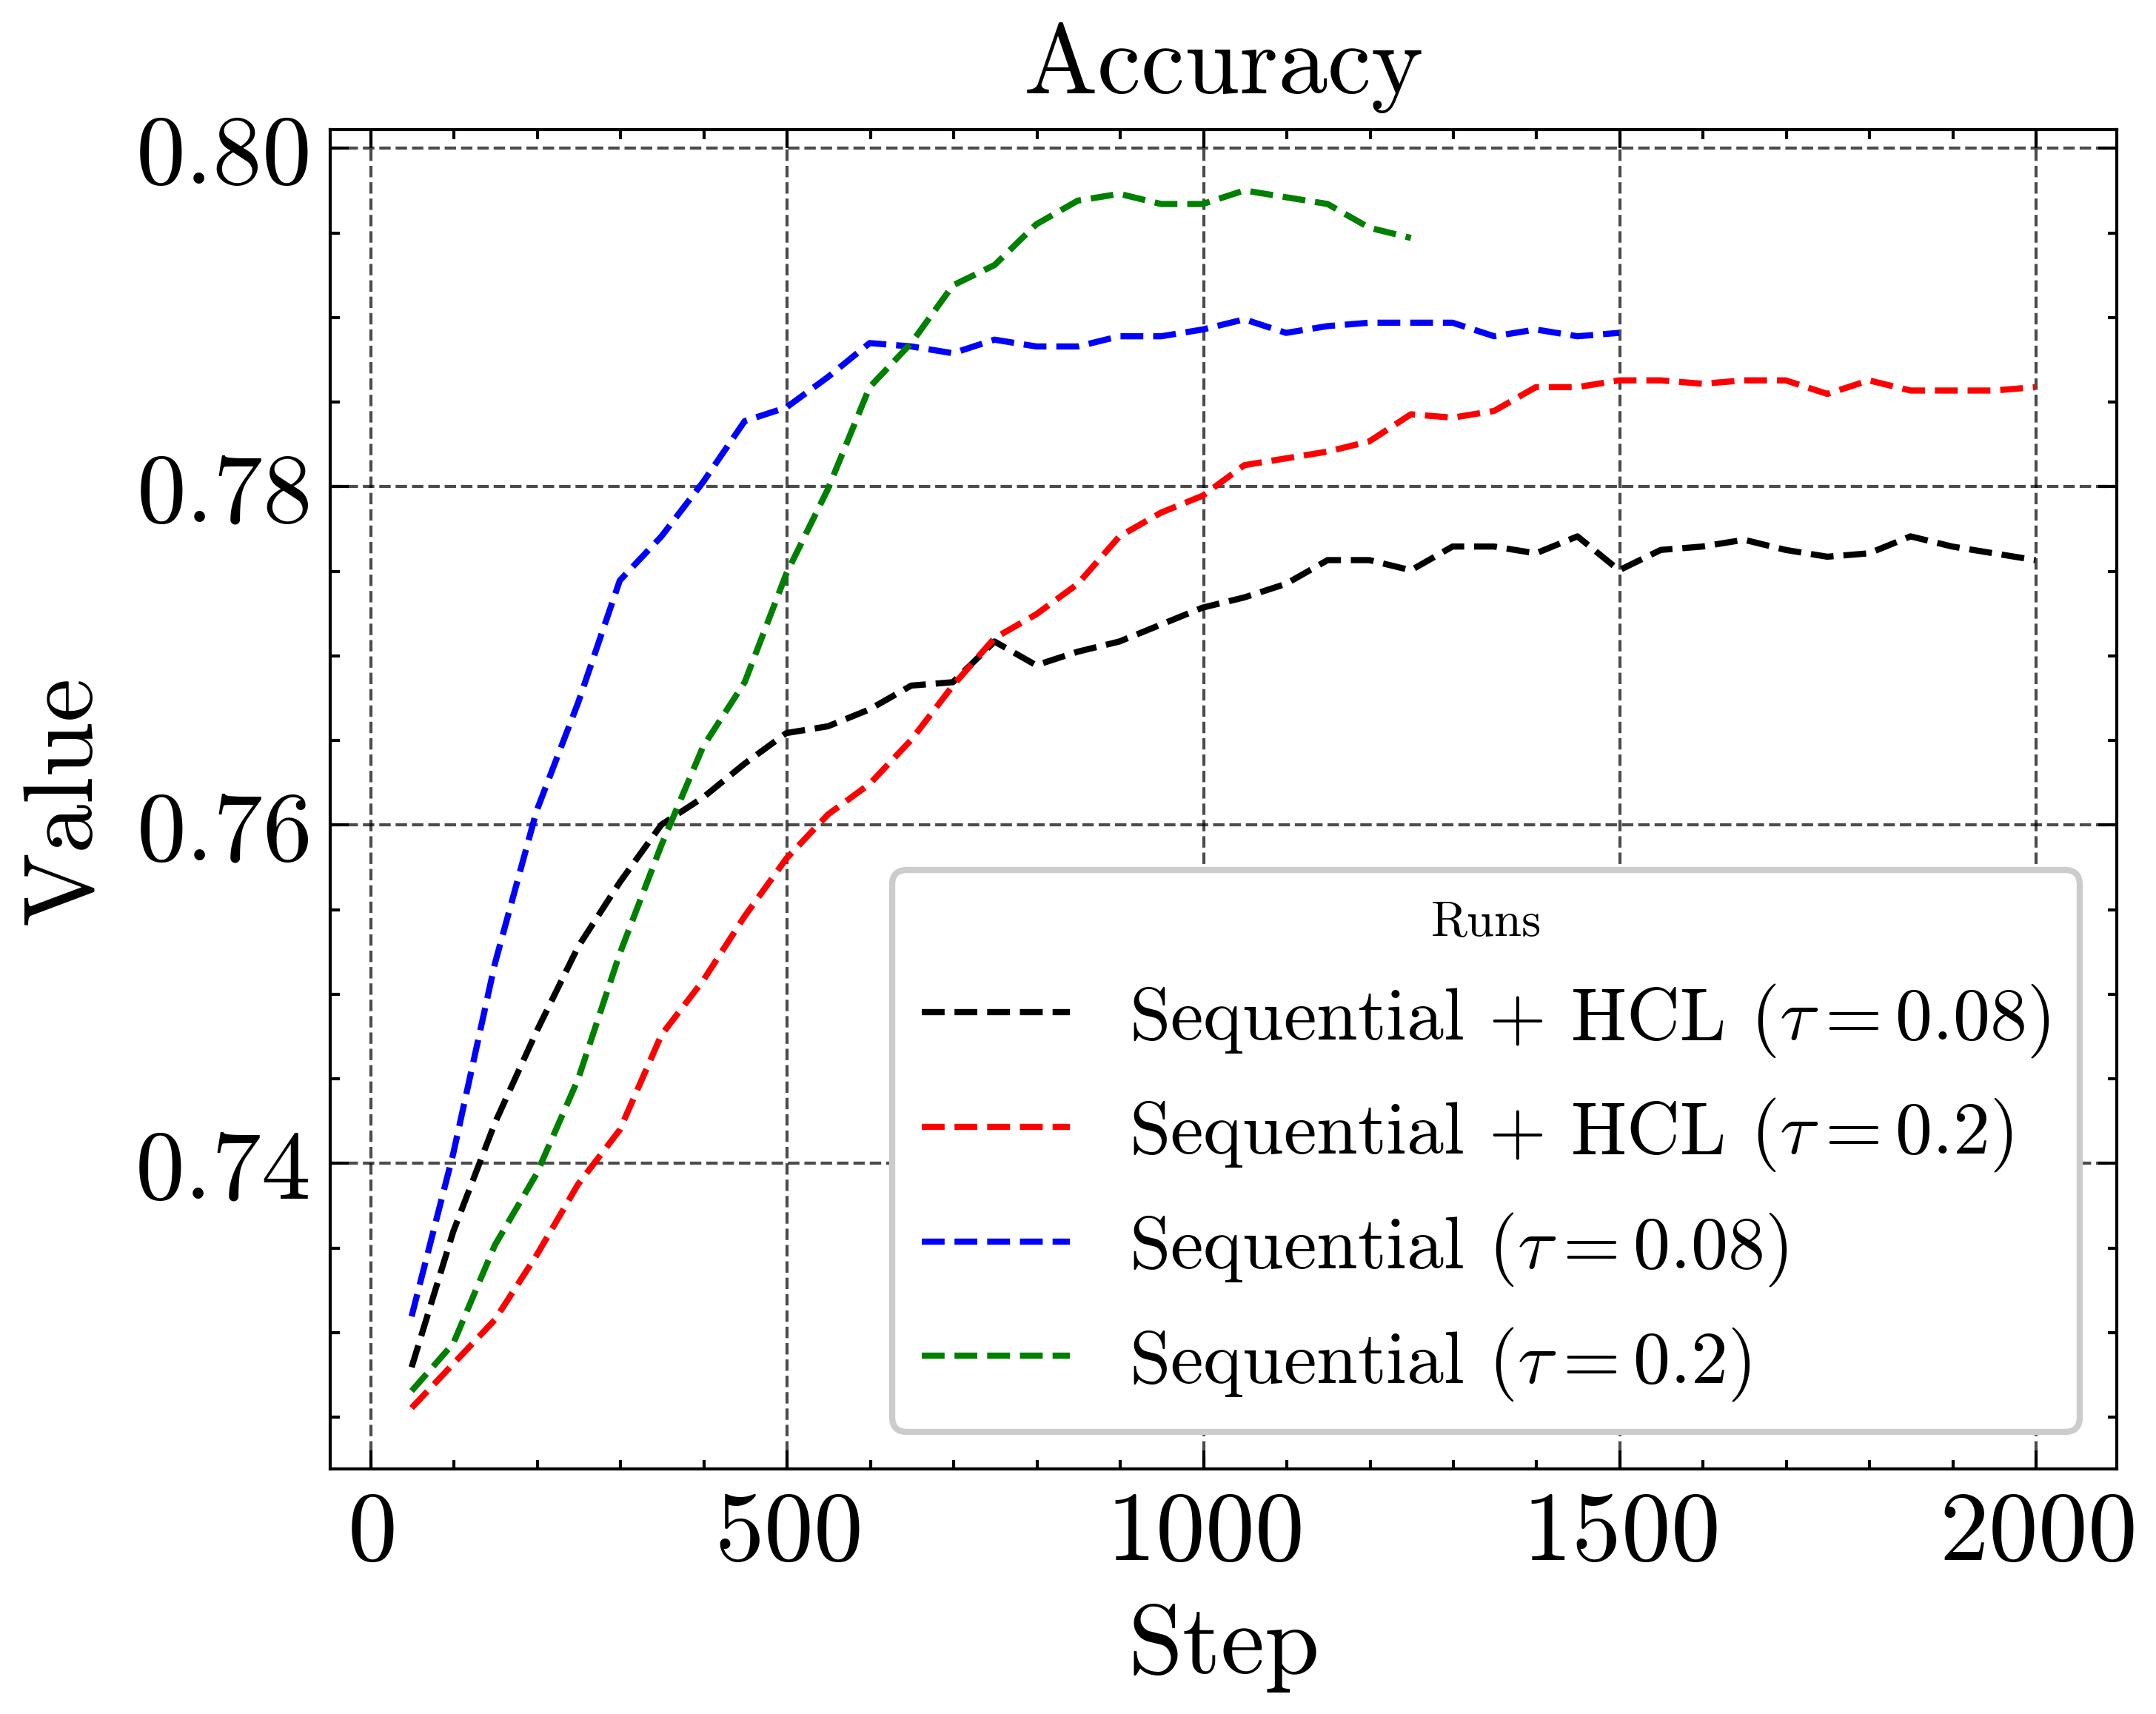

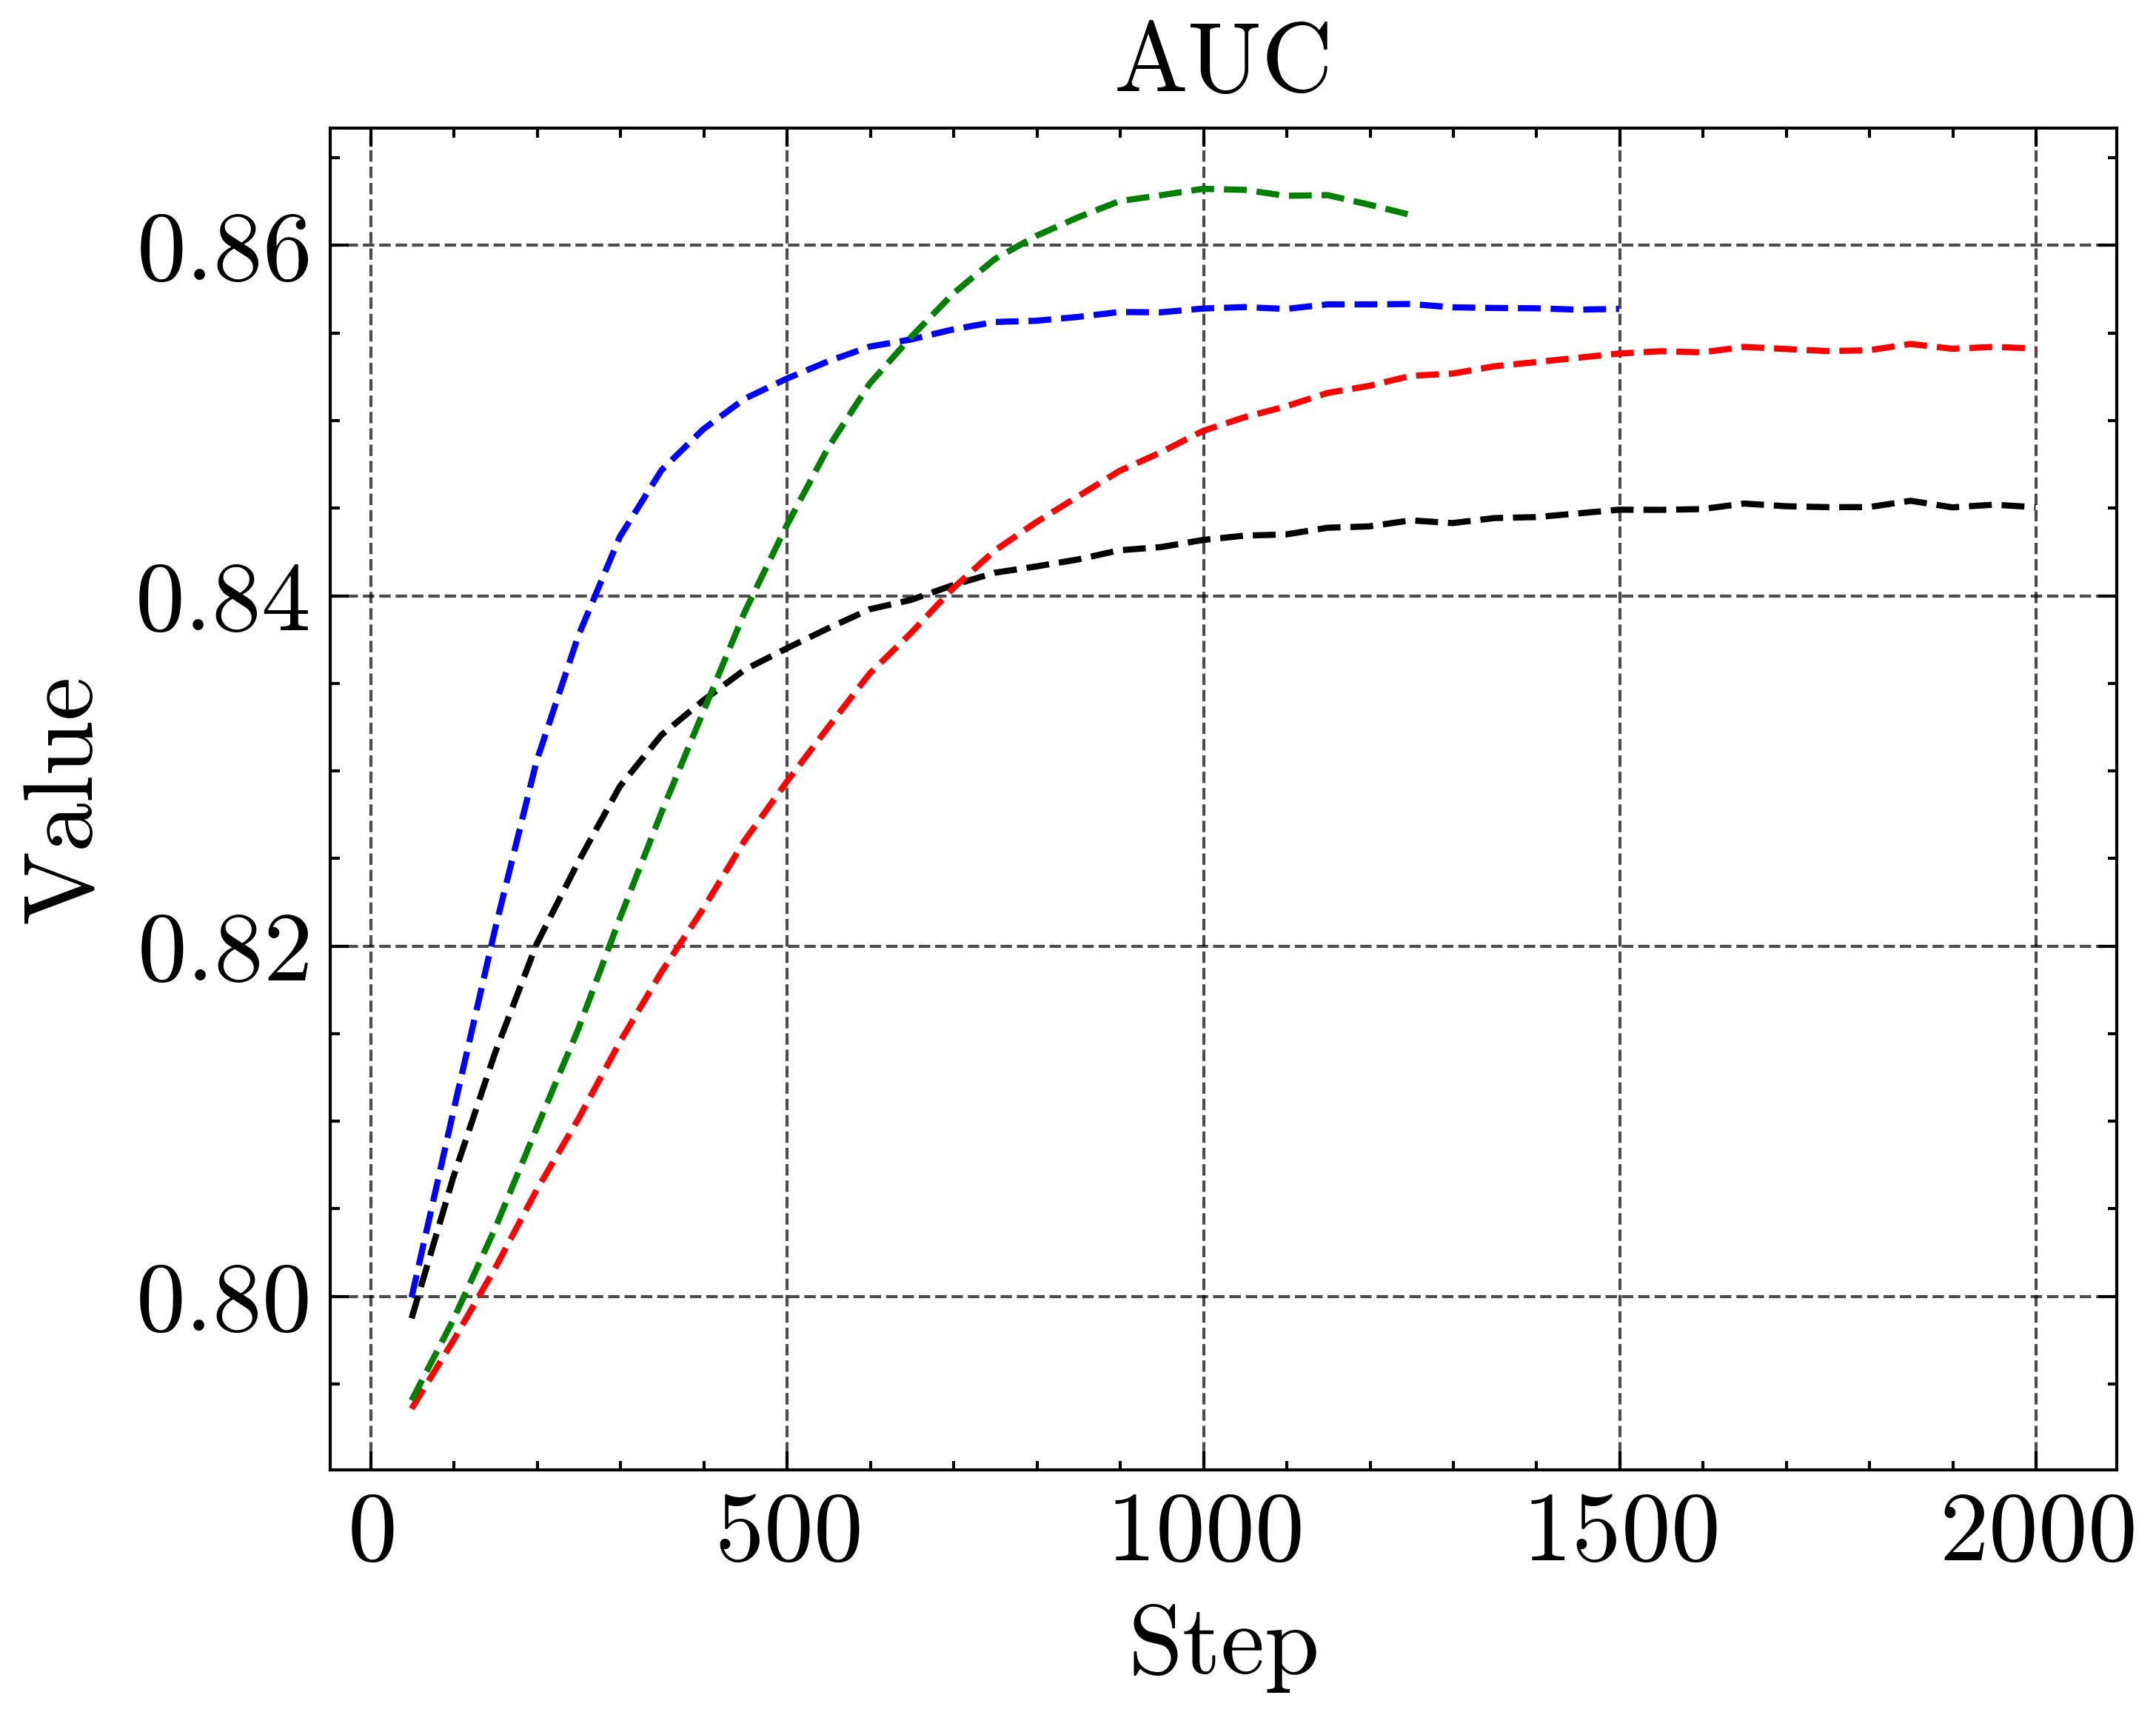

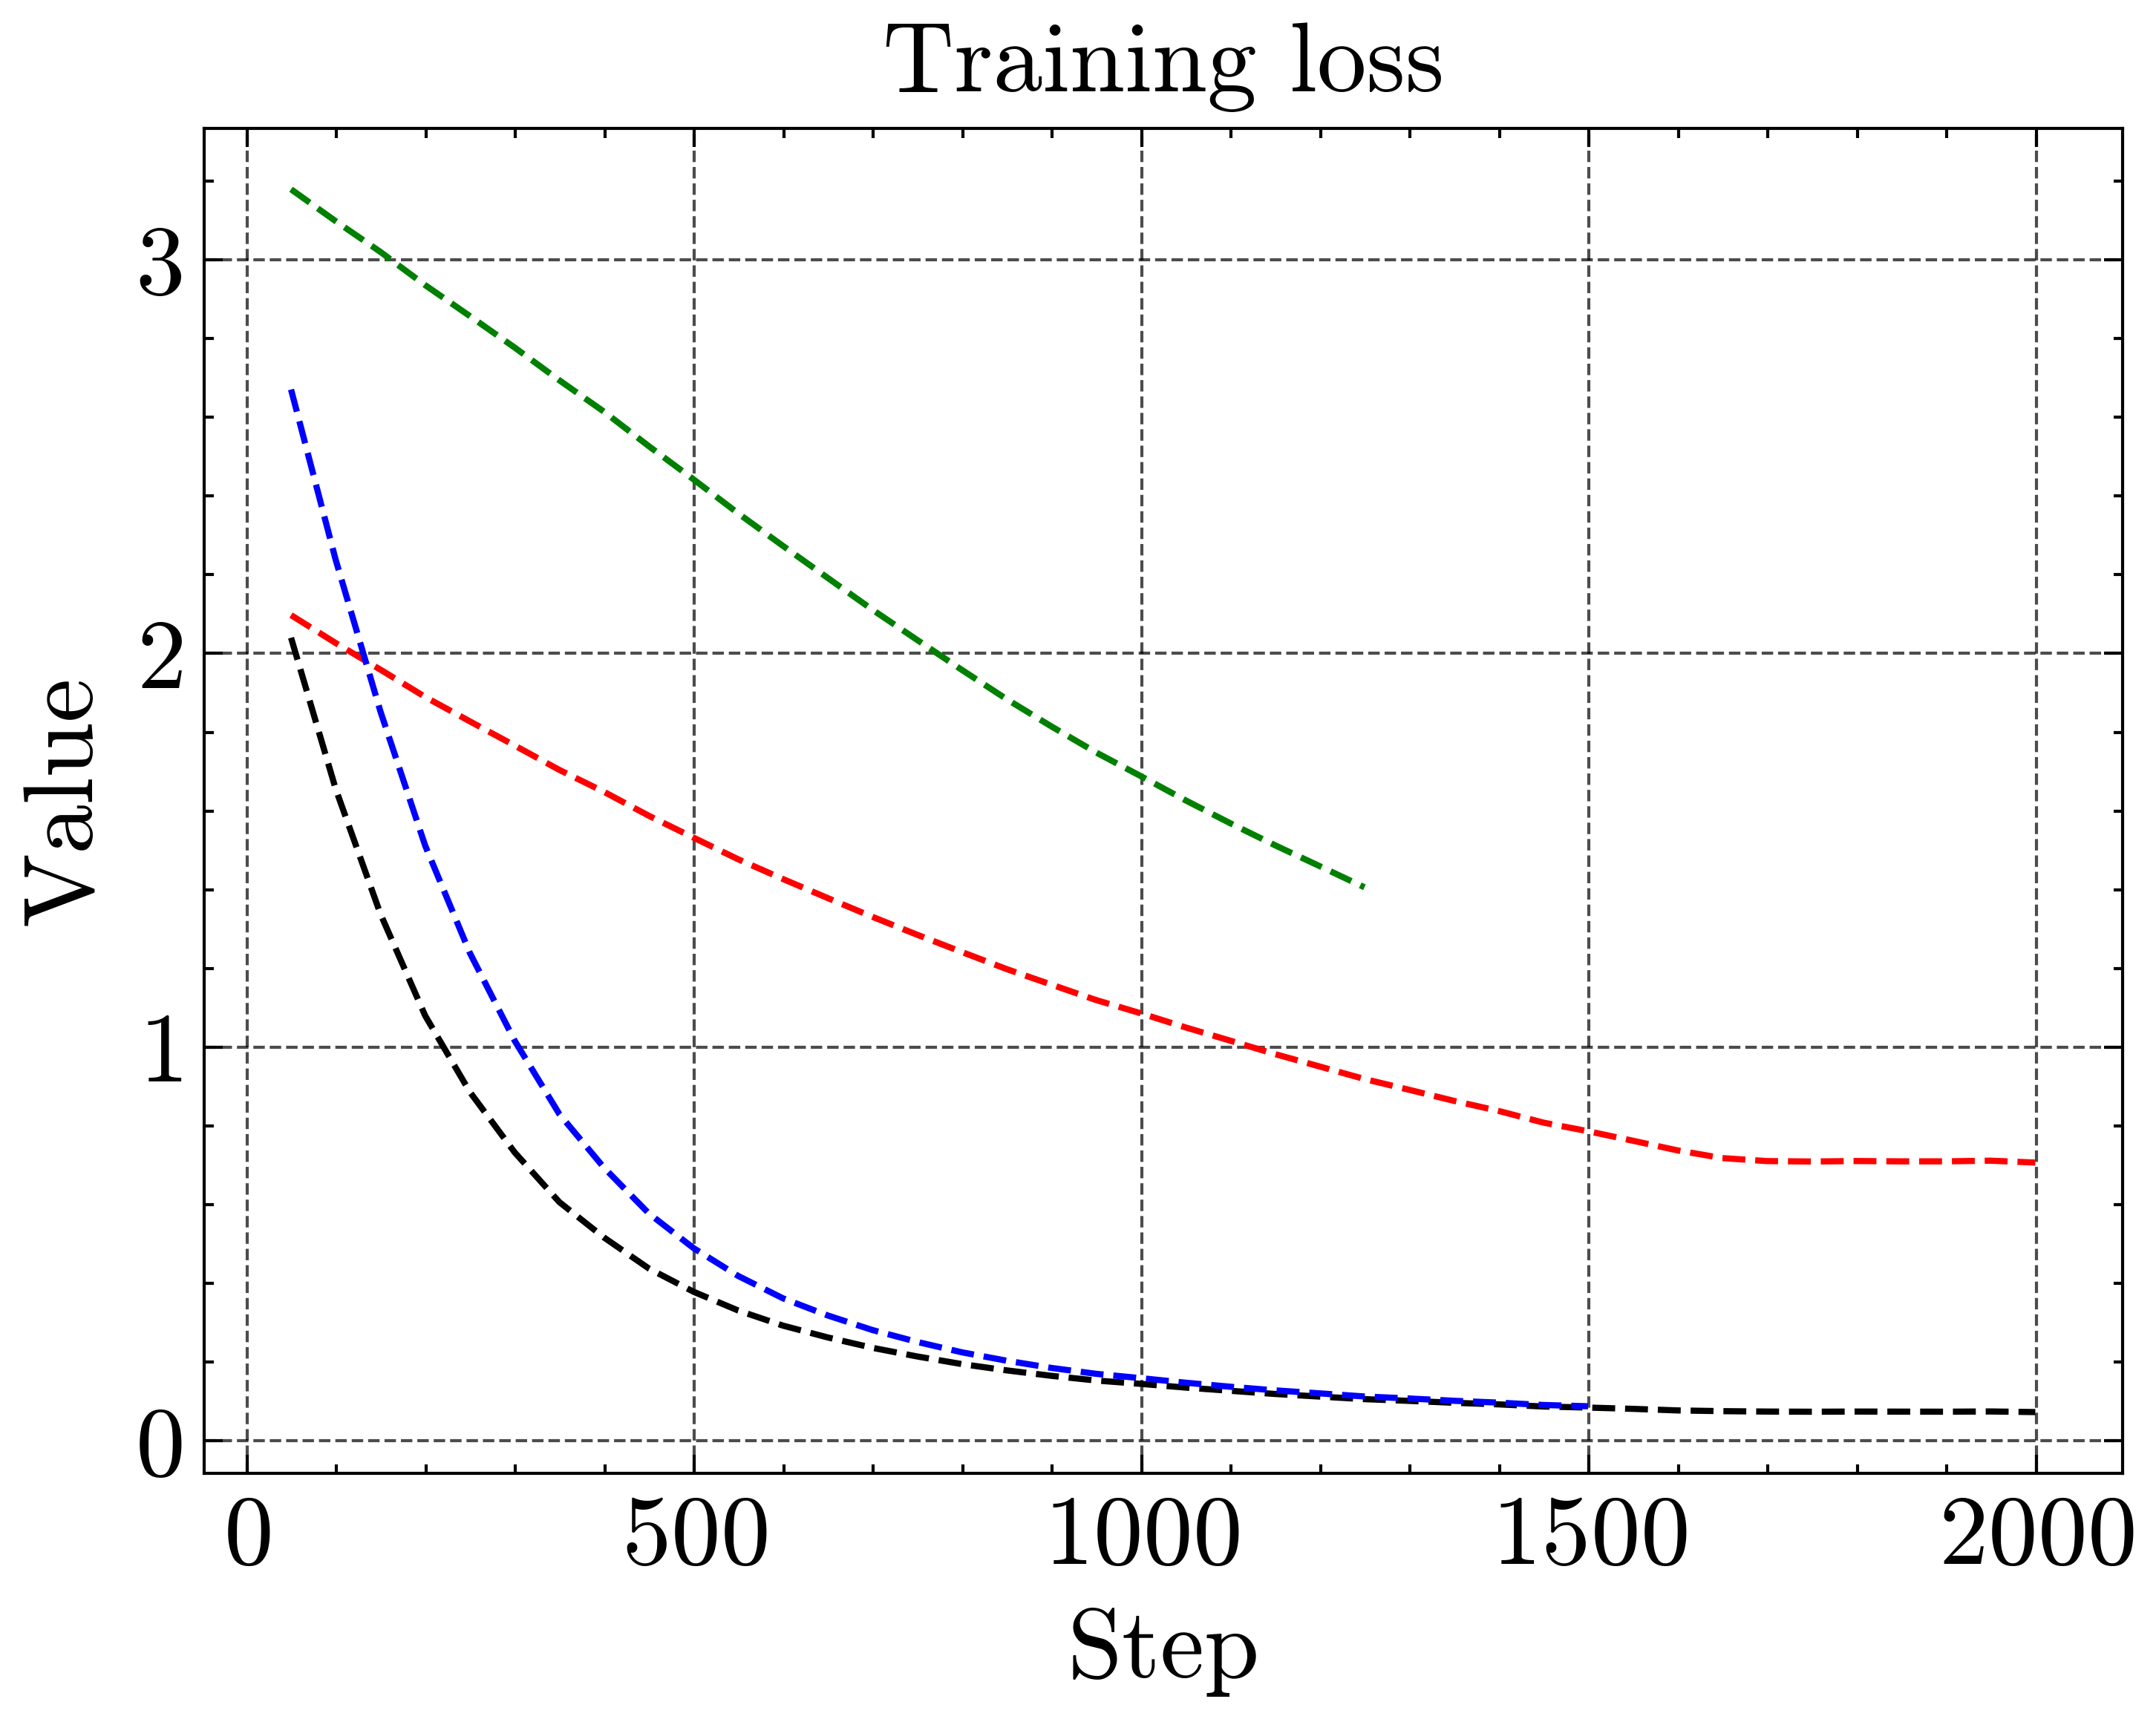

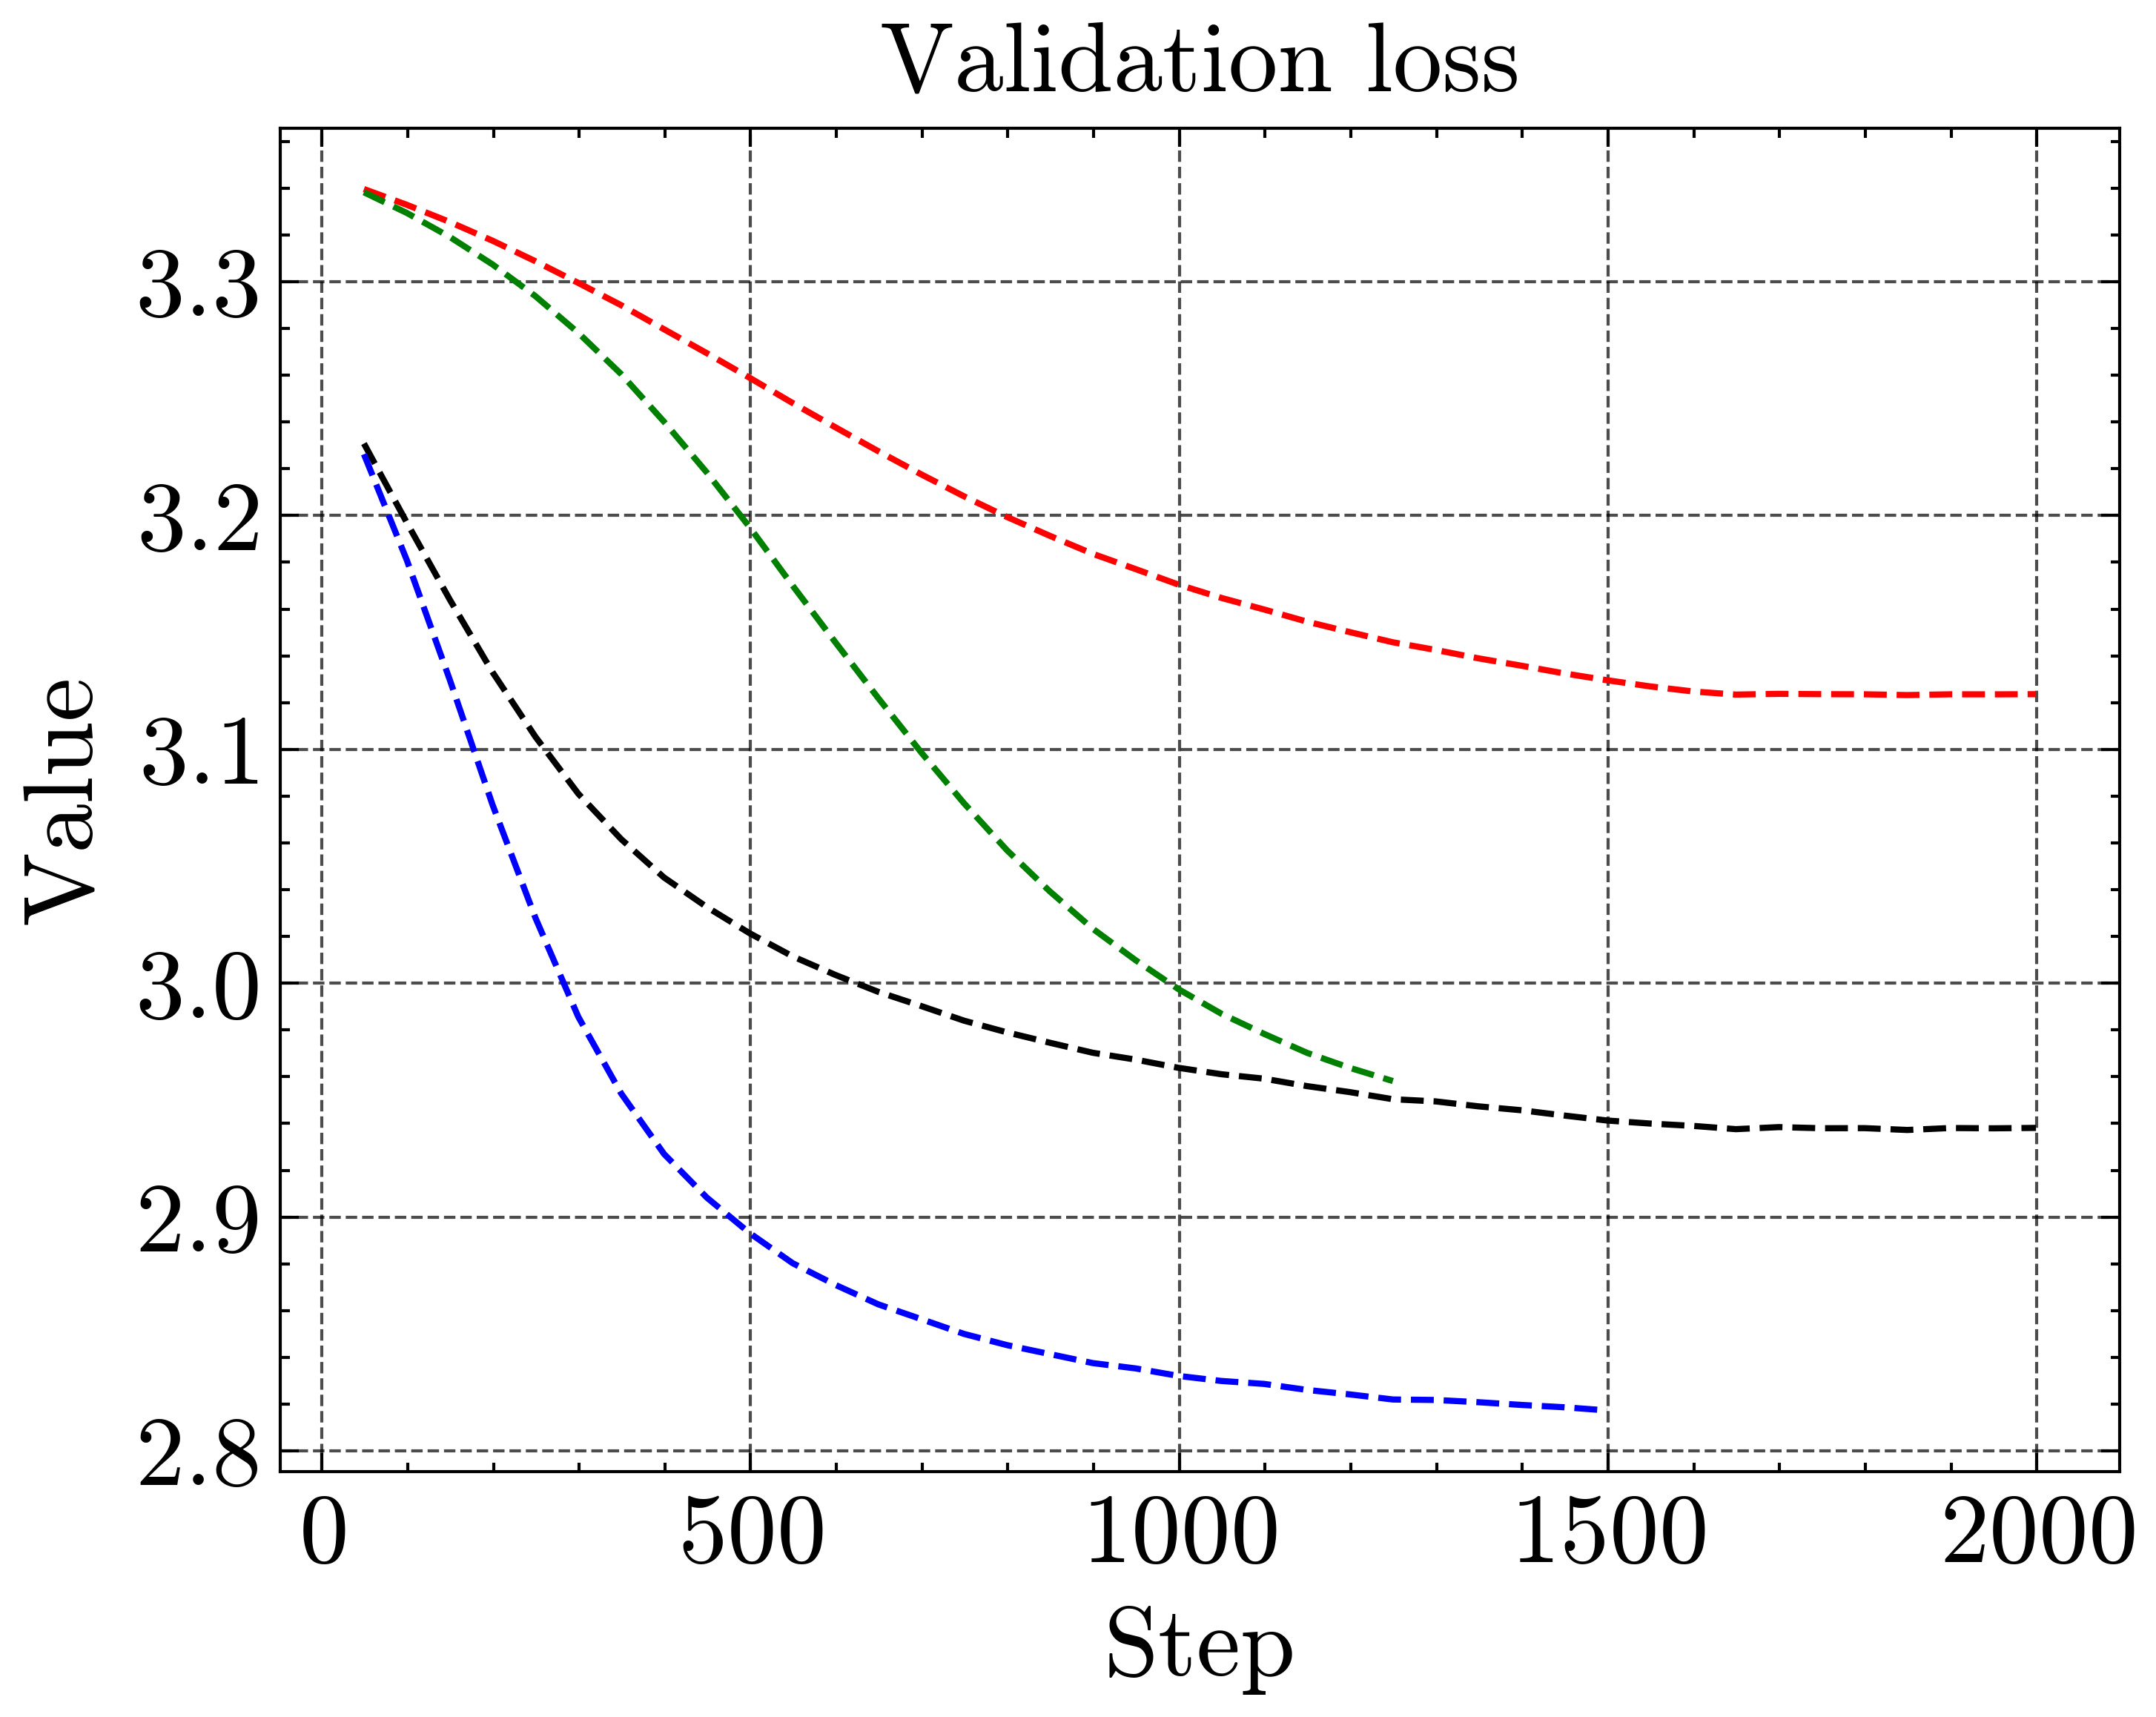

In [48]:
renamed_runs = prepare_runs(TENSORBOARD_URL)
df = fetch_and_process_metrics(renamed_runs, METRICS, TENSORBOARD_URL)
create_metric_plot(df, METRICS, Path(OUTPUT_DIR) / 'sequential')

# All (by metric)

In [68]:
def create_metric_plot(df, metrics, output_dir, mark_x_epochs=5):
    """
    Create and save plots for specified metrics from the given DataFrame.

    Parameters:
    - df: DataFrame containing the metric data.
    - metrics: List of metrics to plot.
    - output_dir: Directory where plots will be saved.
    - mark_x_epochs: Number of epochs at which to mark points on the plot.
    """
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Create a mapping for run types to subplot indices
    run_type_mapping = {
        "Sequential": 0,
        "Random": 1,
        "Sampler": 2
    }

    for metric in metrics:
        metric_data = df[df['metric'] == metric]

        if metric_data.empty:
            print(f"No data available for metric: {metric}")
            continue

        # Create a single figure with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        plt.subplots_adjust(hspace=0.3)

        # Set the x-axis limit based on the maximum step in the data
        max_step = df['Step'].max()
        x_limits = (0, max_step * 1.1)

        for run in metric_data['run'].unique():
            run_data = metric_data[metric_data['run'] == run]

            # Determine subplot index based on run type
            for run_type in run_type_mapping:
                if run_type in run:
                    ax = axs[run_type_mapping[run_type]]
                    ax.plot(run_data['Step'], run_data['Value'], '--', label=run)

                    # Annotate the plot at specified intervals
                    # for step in run_data['Step']:
                    #     step_value = run_data[run_data['Step'] == step]['Value'].values[0]
                    #     xy = (step, step_value)
                    #     line_color = ax.lines[-1].get_color()
# 
                    #     if "Sequential" in run:
                    #         if not (step + 1) % (mark_x_epochs * 50):
                    #             epoch = (step - 1) // 50
                    #             ax.plot(step, step_value, '.', color=line_color)
                    #             ax.annotate(f'{epoch}', xy=xy,
                    #                          textcoords="offset points", xytext=(-3, 10), ha='center', color=line_color, size=10)
                    #     elif "Random" in run:
                    #         if not (step + 1) % (mark_x_epochs * 238):
                    #             epoch = (step - 1) // 238
                    #             ax.plot(step, step_value, '.', color=line_color)
                    #             ax.annotate(f'{epoch}', xy=xy,
                    #                          textcoords="offset points", xytext=(5, -10), ha='center', color=line_color, size=10)

                    ax.set_xlim(x_limits)
                    ax.grid(True, linestyle='--', alpha=0.7)
                    ax.tick_params(axis='both', which='major', labelsize=12)
                    if metric == 'loss/val':
                        ax.set_xlabel("Step", fontsize=14)
                        ax.set_ylabel("Value", fontsize=14)

                    if metric == 'accuracy':
                        # Add a legend to the last subplot
                        ax.legend(title="Runs", fontsize=12)
                        
                    # Set y-label only on the first subplot
                    ax.set_ylabel(metric, fontsize=14)

        # Remove y-labels from the other subplots
        axs[1].set_ylabel("")  # Clear y-label
        axs[2].set_ylabel("")  # Clear y-label
        
        # Save the plot
        metric_safe = metric.replace("/", "_")
        plt.savefig(f"{output_dir}/{metric_safe}.png", dpi=200)
        plt.show()

accuracy fetched for run Sampler ($\tau = 0.08$)
auc fetched for run Sampler ($\tau = 0.08$)
loss/train fetched for run Sampler ($\tau = 0.08$)
loss/val fetched for run Sampler ($\tau = 0.08$)
accuracy fetched for run Sampler ($\tau = 0.2$)
auc fetched for run Sampler ($\tau = 0.2$)
loss/train fetched for run Sampler ($\tau = 0.2$)
loss/val fetched for run Sampler ($\tau = 0.2$)
accuracy fetched for run Sampler + HCL ($\tau = 0.08$)
auc fetched for run Sampler + HCL ($\tau = 0.08$)
loss/train fetched for run Sampler + HCL ($\tau = 0.08$)
loss/val fetched for run Sampler + HCL ($\tau = 0.08$)
accuracy fetched for run Sampler + HCL ($\tau = 0.2$)
auc fetched for run Sampler + HCL ($\tau = 0.2$)
loss/train fetched for run Sampler + HCL ($\tau = 0.2$)
loss/val fetched for run Sampler + HCL ($\tau = 0.2$)
accuracy fetched for run Random ($\tau = 0.08$)
auc fetched for run Random ($\tau = 0.08$)
loss/train fetched for run Random ($\tau = 0.08$)
loss/val fetched for run Random ($\tau = 0.08$)

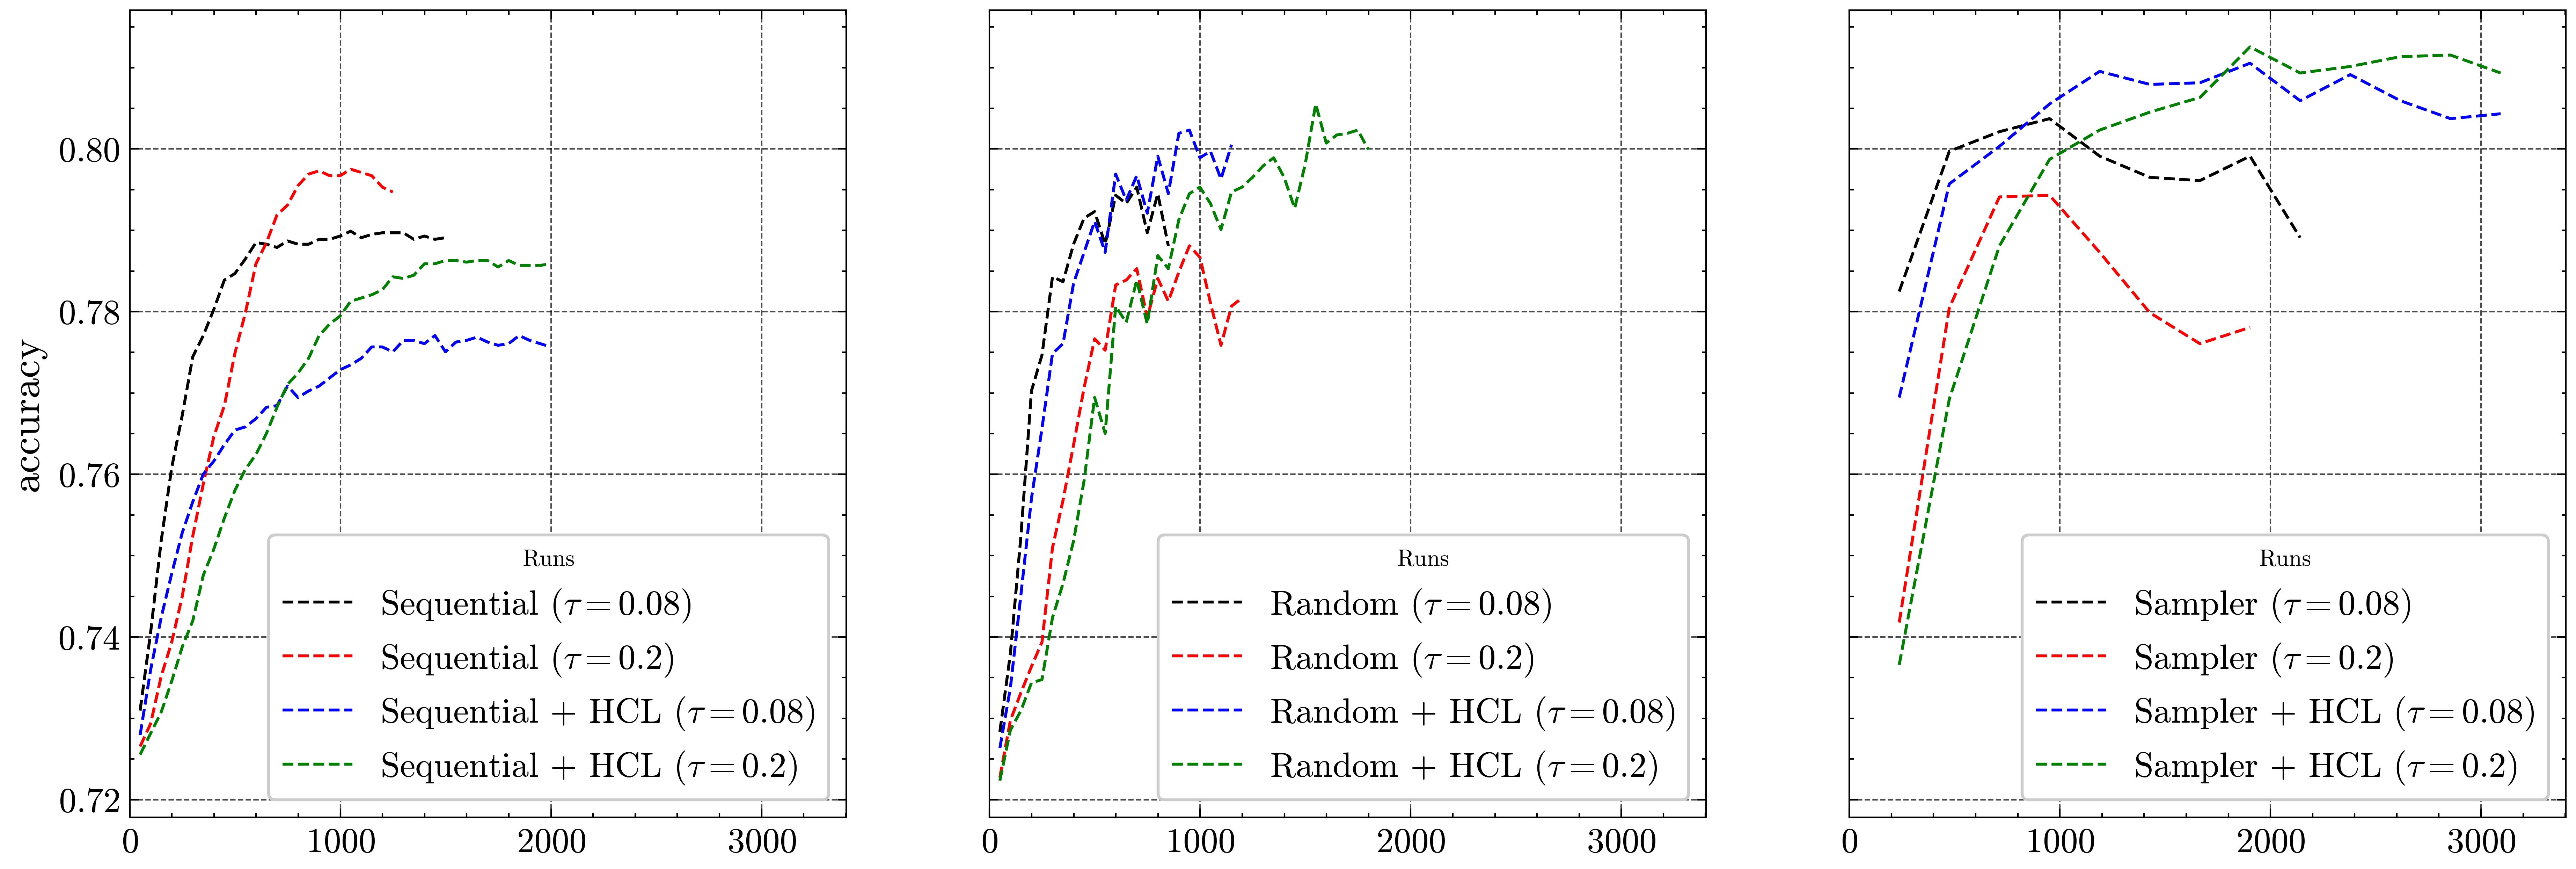

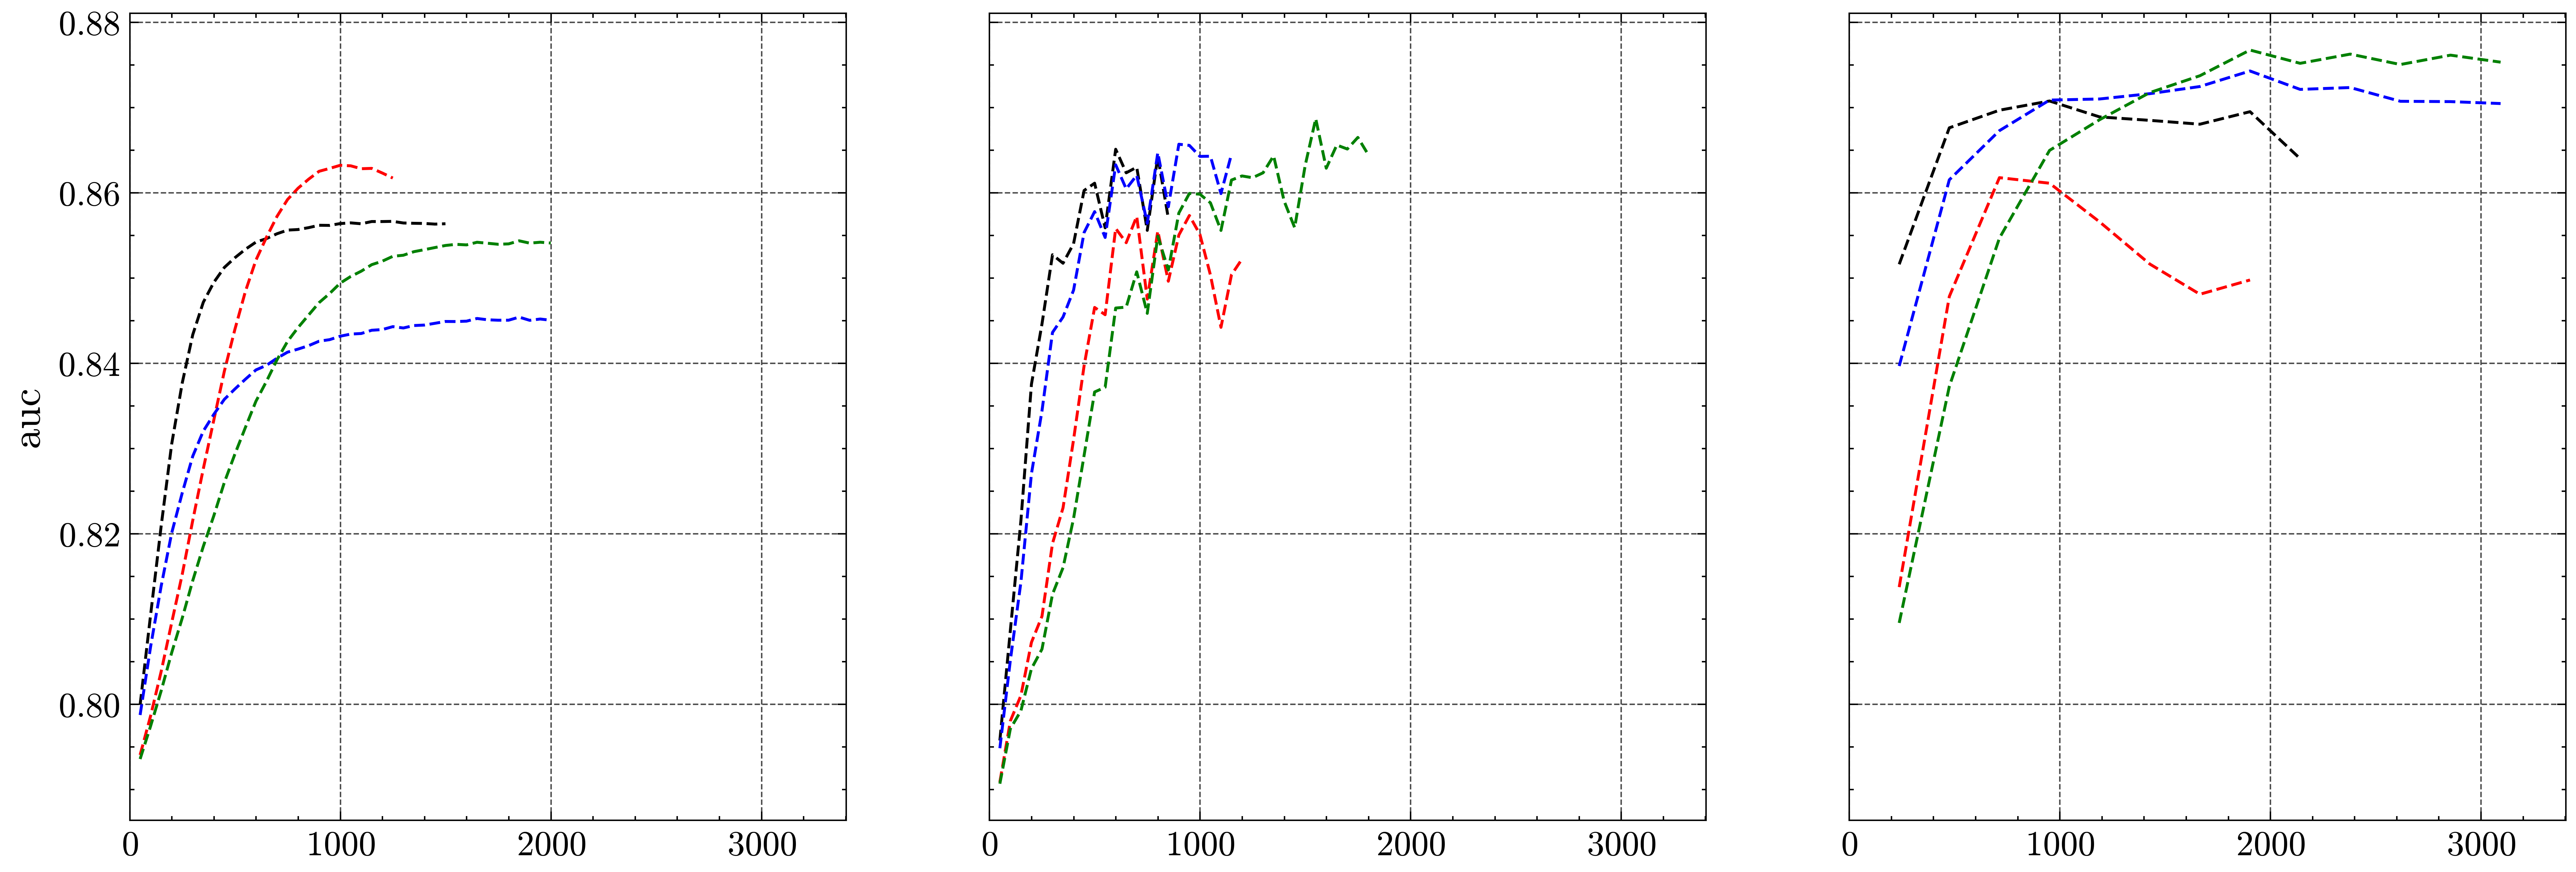

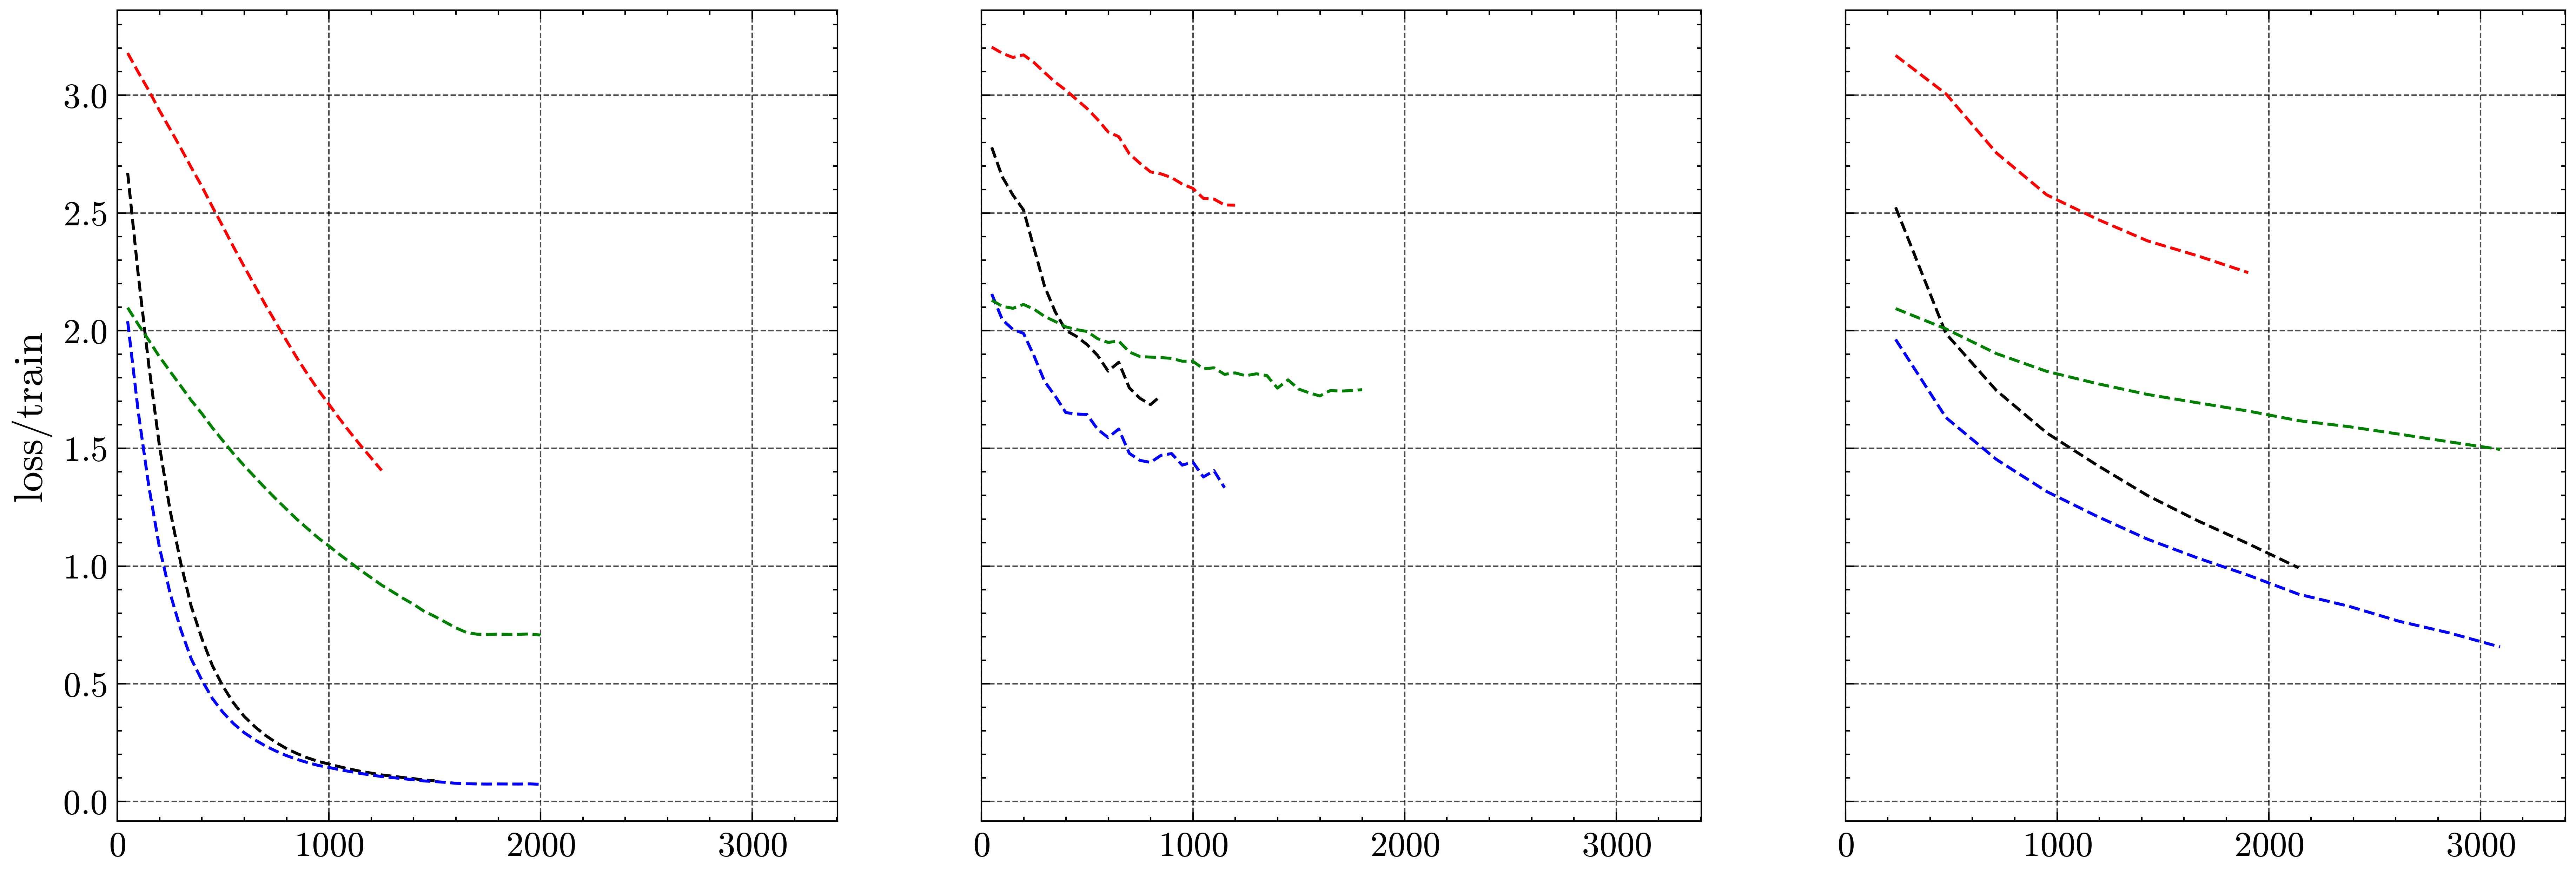

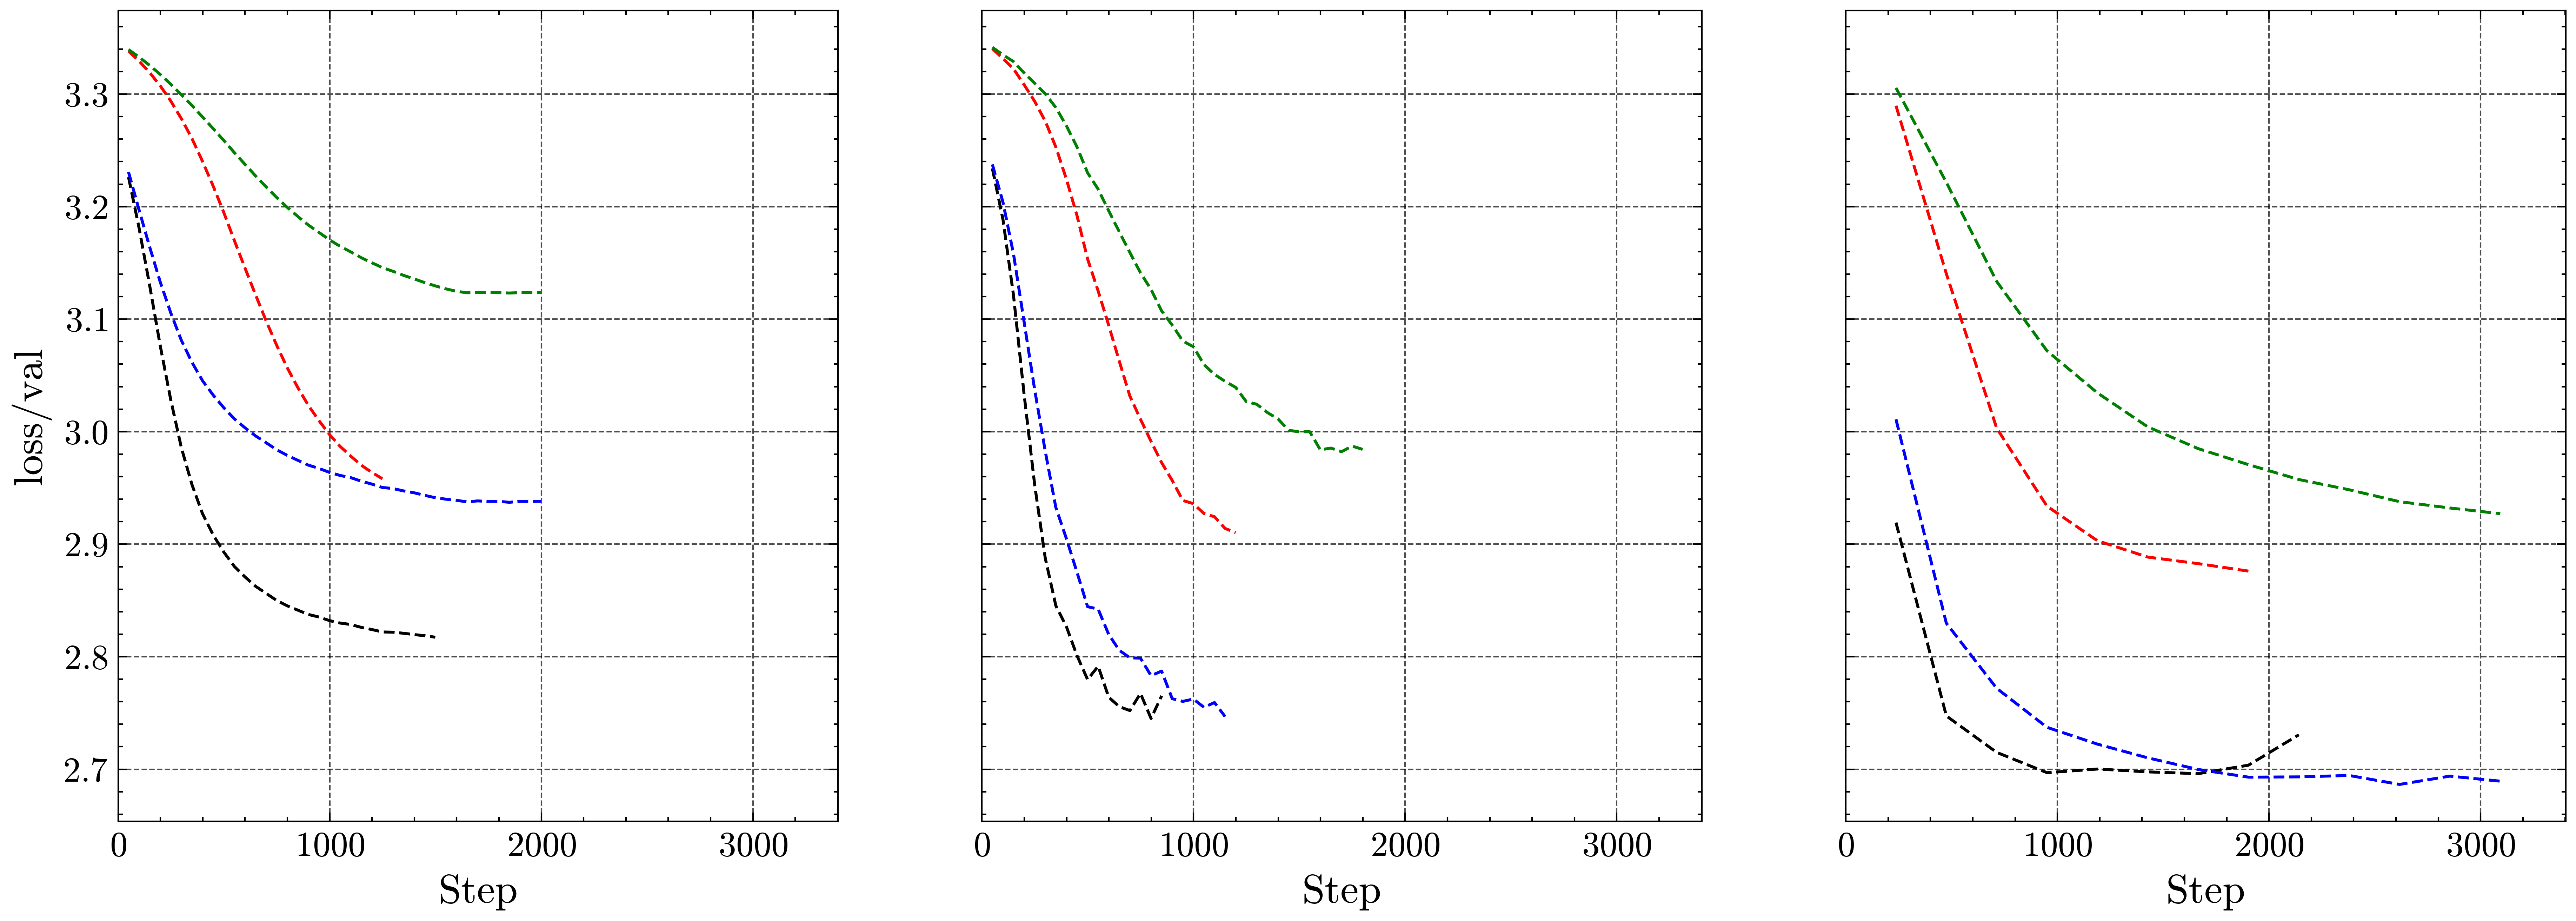

In [72]:
import re

# Original dictionaries
renamed_runs_sampler = {
    'b8fee24c scl:train 2024-09-19 02:05:59 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0': 'Sampler ($\\tau = 0.08$)',
    '61d0a0b0 scl:train 2024-09-19 02:25:34 SOTA2021-like - AdaFace + Sampler/exp/lightning_logs/version_0': 'Sampler ($\\tau = 0.2$)',
    'd1f1156d scl:train 2024-09-19 04:19:19 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0': 'Sampler + HCL ($\\tau = 0.08$)',
    '85a4d335 scl:train 2024-09-19 04:48:04 SOTA2021-like - AdaFace + Sampler + HCL/exp/lightning_logs/version_0': 'Sampler + HCL ($\\tau = 0.2$)'
}
renamed_runs_random = {
    'e576b9b4 scl:train 2024-09-19 08:57:44 SOTA2021-like - AdaFace (random samples)/exp/lightning_logs/version_0': 'Random ($\\tau = 0.08$)',
    '6f96a736 scl:train 2024-09-24 10:55:31 AdaFace (random samples/exp/lightning_logs/version_0': 'Random ($\\tau = 0.2$)',
    'e1ff6ba8 scl:train 2024-09-19 09:14:37 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0': 'Random + HCL ($\\tau = 0.08$)',
    'd6d09a30 scl:train 2024-09-19 12:12:50 SOTA2021-like - AdaFace (random samples) + HCL/exp/lightning_logs/version_0': 'Random + HCL ($\\tau = 0.2$)',
}
renamed_runs_sequential = {
    'ade621a9 scl:train 2024-09-19 08:25:07 SOTA2021-like - AdaFace (sequential samples)/exp/lightning_logs/version_0': 'Sequential ($\\tau = 0.08$)',
    '13da2f02 scl:train 2024-09-24 10:10:33 AdaFace (sequential samples)/exp/lightning_logs/version_0': 'Sequential ($\\tau = 0.2$)',
    '1fa6cde1 scl:train 2024-09-19 07:46:48 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0': 'Sequential + HCL ($\\tau = 0.08$)',
    '96b898ab scl:train 2024-09-19 12:53:38 SOTA2021-like - AdaFace (sequential samples) + HCL/exp/lightning_logs/version_0': 'Sequential + HCL ($\\tau = 0.2$)',
}

# Combine dictionaries
renamed_runs = {**renamed_runs_sampler, **renamed_runs_random, **renamed_runs_sequential}

df = fetch_and_process_metrics(renamed_runs, METRICS, TENSORBOARD_URL)
create_metric_plot(df, METRICS, Path(OUTPUT_DIR) / 'all')